# Report Assignment

## Project Background Information.
All road traffic accidents involving casualties are logged and reported in Great Britain, along with (probably) a majority of other non-fatal road traffic accidents. Every year, the government releases a large batch of data associated with these reports. In this assignment we will be using the data from 2020.
### <u>Data Source
1. The data for 2020 has been extracted from the SQL Lite database into csv documents which will be used for this project
2. In addition, the document in this __[Department for Transport link](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/995424/stats20-2005.pdf)__ has been used to understand the annotations in the dataset and to enable a robust analysis.

__Importing relevant libraries__

In [1]:
#import libraries to read in files
import pandas as pd   
import seaborn as sns 
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

__Reading the csv files__

In [2]:
#load all 4 csv files that we need for this assignment
#There is a date column in the dataset which is handled

#setting the dataframe to be able to show all rows and columns in the dataset
#instead of the default view
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)


accidents_2020 = pd.read_csv('accidents_2020.csv', parse_dates=True)
#make the date column datetime
accidents_2020.date = pd.to_datetime(accidents_2020.date, dayfirst=True)
casualties_2020 = pd.read_csv('casualty_2020.csv')
vehicles_2020 = pd.read_csv('vehicles_2020.csv')
lsoa_data = pd.read_csv('lsoa_data.csv')

### Quick exploration of the dataframes: methods include info, head, isnull and sum.

__Accidents dataframe__

In [3]:
#accidents dataframe info
accidents_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91199 non-null  object        
 1   accident_year                                91199 non-null  int64         
 2   accident_reference                           91199 non-null  object        
 3   location_easting_osgr                        91185 non-null  float64       
 4   location_northing_osgr                       91185 non-null  float64       
 5   longitude                                    91185 non-null  float64       
 6   latitude                                     91185 non-null  float64       
 7   police_force                                 91199 non-null  int64         
 8   accident_severity                            91199 non-null  int64         


In [4]:
#accidents dataframe head
accidents_2020.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020           10219808               521389.0   
1  2020010220496           2020           10220496               529337.0   
2  2020010228005           2020           10228005               526432.0   
3  2020010228006           2020           10228006               538676.0   
4  2020010228011           2020           10228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  number_of_casualties       date  \
0                  3                   1                     1 2020-02-04   
1                  3                   1                     2 2020-04-27   
2                  3                   1                     1 2020-01-01   
3                  2                   1                     1 2020-01-01   
4                  3                   1                     2 2020-01-01   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            3  09:00                        10                    E09000032   
1            2  13:55                         9                    E09000022   
2            4  01:25                         1                    E09000033   
3            4  01:50                        17                    E09000025   
4            4  02:25                         1                    E09000033   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000032                 6                  0          6   
1               E09000022                 3               3036          6   
2               E09000033                 5                  0          6   
3               E09000025                 3                 11          6   
4               E09000033                 3                 40          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  0   
1           20                9                 2                  6   
2           30                3                 1                  6   
3           30                0                -1                  0   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  9   
1                   0                                  0   
2                   0                                  0   
3                  -1                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                    1   

In [5]:
#accidents dataframe null values check
accidents_2020.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [6]:
#accidents dataframe quick statistics
accidents_2020.describe()

accident_year  location_easting_osgr  location_northing_osgr  \
count        91199.0           91185.000000            9.118500e+04   
mean          2020.0          456487.876416            2.737645e+05   
min           2020.0           65947.000000            1.271500e+04   
25%           2020.0          392890.000000            1.745690e+05   
50%           2020.0          465545.000000            2.085990e+05   
75%           2020.0          530168.000000            3.783660e+05   
max           2020.0          655138.000000            1.184351e+06   
std              0.0           93512.711807            1.473516e+05   

          longitude      latitude  police_force  accident_severity  \
count  91185.000000  91185.000000  91199.000000       91199.000000   
mean      -1.189258     52.351073     27.488043           2.768232   
min       -7.497375     49.970479      1.000000           1.000000   
25%       -2.107789     51.457237      4.000000           3.000000   
50%       -1.046912     51.763385     22.000000           3.000000   
75%       -0.125238     53.297386     45.000000           3.000000   
max        1.756257     60.541144     99.000000           3.000000   
std        1.367786      1.327573     24.548964           0.456682   

       number_of_vehicles  number_of_casualties  \
count        91199.000000          91199.000000   
mean             1.835272              1.267382   
min              1.000000              1.000000   
25%              1.000000              1.000000   
50%              2.000000              1.000000   
75%              2.000000              1.000000   
max             13.000000             41.000000   
std              0.677272              0.681473   

                                date   day_of_week  local_authority_district  \
count                          91199  91199.000000              91199.000000   
mean   2020-07-06 10:32:16.837026816      4.121558                311.482812   
min              2020-01-01 00:00:00      1.000000                 -1.000000   
25%              2020-03-17 00:00:00      2.000000                 63.000000   
50%              2020-07-21 00:00:00      4.000000                300.000000   
75%              2020-10-06 00:00:00      6.000000                502.000000   
max              2020-12-31 00:00:00      7.000000                941.000000   
std                              NaN      1.932200                253.456329   

       first_road_class  first_road_number     road_type   speed_limit  \
count      91199.000000       91199.000000  91199.000000  91199.000000   
mean           4.220320         790.666071      5.256001     36.270113   
min            1.000000           0.000000      1.000000     -1.000000   
25%            3.000000           0.000000      6.000000     30.000000   
50%            4.000000          34.000000      6.000000     30.000000   
75%            6.000000         538.000000      6.000000     40.000000   
max            6.000000        9174.000000      9.000000     70.000000   
std            1.443475        1580.817743      1.684878     13.896032   

       junction_detail  junction_control  second_road_class  \
count     91199.000000      91199.000000       91199.000000   
mean          3.934879          1.737497           3.048038   
min          -1.000000         -1.000000          -1.000000   
25%           0.000000         -1.000000           0.000000   
50%           2.000000          2.000000           3.000000   
75%           3.000000          4.000000           6.000000   
max          99.000000          9.000000           6.000000   
std          12.612777          2.510125           2.747398   

       second_road_number  pedestrian_crossing_human_control  \
count        91199.000000                       91199.000000   
mean           219.814899                           0.352975   
min             -1.000000                          -1.000000   
25%             -1.000000                           0.000000   


__Casualties dataframe__

In [7]:
#casualties dataframe info
casualties_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [8]:
#casualties dataframe head
casualties_2020.head()

casualty_index accident_index  accident_year accident_reference  \
0          484748  2020010219808           2020          010219808   
1          484749  2020010220496           2020          010220496   
2          484750  2020010220496           2020          010220496   
3          484751  2020010228005           2020          010228005   
4          484752  2020010228006           2020          010228006   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  1                   1               3                1   
1                  1                   1               3                2   
2                  1                   2               3                2   
3                  1                   1               3                1   
4                  1                   1               3                1   

   age_of_casualty  age_band_of_casualty  casualty_severity  \
0               31                     6                  3   
1                2                     1                  3   
2                4                     1                  3   
3               23                     5                  3   
4               47                     8                  2   

   pedestrian_location  pedestrian_movement  car_passenger  \
0                    9                    5              0   
1                    1                    1              0   
2                    1                    1              0   
3                    5                    9              0   
4                    4                    1              0   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type  \
0                       0                                   0              0   
1                       0                                   0              0   
2                       0                                   0              0   
3                       0                                   0              0   
4                       0                                   0              0   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    4  
1                        1                    2  
2                        1                    2  
3                        1                    3  
4                        1                    3

In [9]:
#casualties dataframe null values check
casualties_2020.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [10]:
#casualties dataframe quick statistics
casualties_2020.describe()

casualty_index  accident_year  vehicle_reference  casualty_reference  \
count   115584.000000       115584.0      115584.000000       115584.000000   
mean    542539.500000         2020.0           1.460557            1.347790   
std      33366.371094            0.0           2.991765            4.036721   
min     484748.000000         2020.0           1.000000            1.000000   
25%     513643.750000         2020.0           1.000000            1.000000   
50%     542539.500000         2020.0           1.000000            1.000000   
75%     571435.250000         2020.0           2.000000            1.000000   
max     600331.000000         2020.0         999.000000          992.000000   

       casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty  \
count   115584.000000    115584.000000    115584.000000         115584.000000   
mean         1.441272         1.354859        36.489748              6.292610   
std          0.708365         0.520195        18.985022              2.392856   
min          1.000000        -1.000000        -1.000000             -1.000000   
25%          1.000000         1.000000        23.000000              5.000000   
50%          1.000000         1.000000        33.000000              6.000000   
75%          2.000000         2.000000        50.000000              8.000000   
max          3.000000         9.000000        99.000000             11.000000   

       casualty_severity  pedestrian_location  pedestrian_movement  \
count      115584.000000        115584.000000        115584.000000   
mean            2.800820             0.696861             0.561592   
std             0.429851             2.059930             1.879680   
min             1.000000            -1.000000            -1.000000   
25%             3.000000             0.000000             0.000000   
50%             3.000000             0.000000             0.000000   
75%             3.000000             0.000000             0.000000   
max             3.000000            10.000000             9.000000   

       car_passenger  bus_or_coach_passenger  \
count  115584.000000           115584.000000   
mean        0.223093                0.038950   
std         0.603991                0.381528   
min        -1.000000               -1.000000   
25%         0.000000                0.000000   
50%         0.000000                0.000000   
75%         0.000000                0.000000   
max         9.000000                9.000000   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       115584.000000  115584.000000   
mean                             0.012709       7.388367   
std                              0.164516       9.914714   
min                             -1.000000       0.000000   
25%                              0.000000       1.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   

       casualty_home_area_type  casualty_imd_decile  
count            115584.000000         115584.00000  
mean                  1.078177              4.36114  
std                   0.904791              3.17141  
min                  -1.000000             -1.00000  
25%                   1.000000              2.00000  
50%                   1.000000              4.00000  
75%                   1.000000              7.00000  
max                   3.000000             10.00000

__Vehicles dataframe__

In [11]:
#vehicles dataframe info
vehicles_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [12]:
#vehicles dataframe head
vehicles_2020.head()

vehicle_index accident_index  accident_year accident_reference  \
0         681716  2020010219808           2020           10219808   
1         681717  2020010220496           2020           10220496   
2         681718  2020010228005           2020           10228005   
3         681719  2020010228006           2020           10228006   
4         681720  2020010228011           2020           10228011   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             9                        9   
1                  1             9                        0   
2                  1             9                        0   
3                  1             8                        0   
4                  1             9                        0   

   vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
0                  5                       1                     5   
1                  4                       2                     6   
2                 18                      -1                    -1   
3                 18                       1                     5   
4                 18                       3                     7   

   vehicle_location_restricted_lane  junction_location  \
0                                 0                  0   
1                                 0                  2   
2                                 0                  0   
3                                 0                  0   
4                                 9                  1   

   skidding_and_overturning  hit_object_in_carriageway  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   vehicle_leaving_carriageway  hit_object_off_carriageway  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   first_point_of_impact  vehicle_left_hand_drive  journey_purpose_of_driver  \
0                      4                        9                          6   
1                      1                        1                          2   
2                      1                        1                          6   
3                      1                        1                          1   
4                      1                        1                          6   

   sex_of_driver  age_of_driver  age_band_of_driver  engine_capacity_cc  \
0              2             32                   6                1968   
1              1             45                   7                1395   
2              3             -1                  -1                  -1   
3              1             44                   7                1798   
4              1             20                   4                2993   

   propulsion_code  age_of_vehicle generic_make_model  driver_imd_decile  \
0                2               6            AUDI Q5                  4   
1                1               2            AUDI A1                  7   
2               -1              -1                 -1                 -1   
3                8               8       TOYOTA PRIUS                  2   
4                2               4       BMW 4 SERIES                 -1   

   driver_home_area_type  
0                      1  
1                      1  
2                     -1  
3                      1  
4                     -1

In [13]:
#vehicles dataframe null values check
vehicles_2020.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [14]:
#vehicles dataframe quick statistics
vehicles_2020.describe()

vehicle_index  accident_year  vehicle_reference   vehicle_type  \
count   167375.00000       167375.0      167375.000000  167375.000000   
mean    765403.00000         2020.0           1.549198      10.051310   
std      48317.14499            0.0           2.538196      11.692412   
min     681716.00000         2020.0           1.000000       1.000000   
25%     723559.50000         2020.0           1.000000       9.000000   
50%     765403.00000         2020.0           1.000000       9.000000   
75%     807246.50000         2020.0           2.000000       9.000000   
max     849090.00000         2020.0         999.000000      98.000000   

       towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from  \
count            167375.000000      167375.000000           167375.000000   
mean                  0.221664          19.538987                4.406387   
std                   1.344230          23.661274                2.718826   
min                  -1.000000          -1.000000               -1.000000   
25%                   0.000000           9.000000                2.000000   
50%                   0.000000          18.000000                5.000000   
75%                   0.000000          18.000000                7.000000   
max                   9.000000          99.000000                9.000000   

       vehicle_direction_to  vehicle_location_restricted_lane  \
count         167375.000000                     167375.000000   
mean               4.455068                          7.537870   
std                2.696937                         25.898393   
min               -1.000000                         -1.000000   
25%                2.000000                          0.000000   
50%                5.000000                          0.000000   
75%                7.000000                          0.000000   
max                9.000000                         99.000000   

       junction_location  skidding_and_overturning  hit_object_in_carriageway  \
count      167375.000000             167375.000000              167375.000000   
mean            2.598303                  0.920335                   7.859979   
std             3.285627                  2.497212                  26.133397   
min            -1.000000                 -1.000000                  -1.000000   
25%             0.000000                  0.000000                   0.000000   
50%             1.000000                  0.000000                   0.000000   
75%             6.000000                  0.000000                   0.000000   
max             9.000000                  9.000000                  99.000000   

       vehicle_leaving_carriageway  hit_object_off_carriageway  \
count                167375.000000               167375.000000   
mean                      1.005078                    7.986999   
std                       2.627550                   26.238646   
min                      -1.000000                   -1.000000   
25%                       0.000000                    0.000000   
50%                       0.000000                    0.000000   
75%                       0.000000                    0.000000   
max                       9.000000                   99.000000   

       first_point_of_impact  vehicle_left_hand_drive  \
count          167375.000000            167375.000000   
mean                1.993237                 1.448962   
std                 1.750088                 1.854349   
min                -1.000000                -1.000000   
25%                 1.000000                 1.000000   
50%                 1.000000                 1.000000   
75%                 3.000000                 1.000000   
max                 9.000000                 9.000000   

       journey_purpose_of_driver  sex_of_driver  age_of_driver  \
count              167375.000000  167375.000000  167375.000000   
mean                    4.717066       1.480347      34.509658   
std                     1.914971

__LSOA dataframe__

In [15]:
#lsoa dataframe info
lsoa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [16]:
#lsoa dataframe head
lsoa_data.head()

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0         1  E01000001  City of London 001A  City of London 001A   
1         2  E01000002  City of London 001B  City of London 001B   
2         3  E01000003  City of London 001C  City of London 001C   
3         4  E01000004  City of London 001D  City of London 001D   
4         5  E01000005  City of London 001E  City of London 001E   

    shape__area  shape__length                              globalid  
0  1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1  2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2  5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3  2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4  1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311

In [17]:
#lsoa dataframe null values check
lsoa_data.isnull().sum()

objectid         0
lsoa01cd         0
lsoa01nm         0
lsoa01nmw        0
shape__area      0
shape__length    0
globalid         0
dtype: int64

In [18]:
#lsoa dataframe quick statistics
lsoa_data.describe()

objectid   shape__area  shape__length
count  34378.000000  3.437800e+04   34378.000000
mean   17189.500000  4.484756e+06    8672.586392
std     9924.218114  1.497949e+07   11186.682402
min        1.000000  1.836184e+04     794.752314
25%     8595.250000  2.804555e+05    3329.866718
50%    17189.500000  4.843540e+05    4605.231856
75%    25783.750000  1.509910e+06    7947.973477
max    34378.000000  6.837464e+08  176560.397355

### Observations from quick checks done on 4 dataframes so far:
- Accidents dataframe has missing values in location-related columns: location_easting_osgr, location_northing_osgr, longitude, and latitude.
- Casualties and Vehicles dataframes does not contain null values
- All the dataframes have  the correct datatypes

## DATA CLEANING

__Dropping the null values in the accidents dataframe__

In [19]:
#dropping null values
accidents_2020 = accidents_2020[accidents_2020.notnull().all(axis=1)]
accidents_2020.shape

(91185, 36)

__Checking if there are duplicate values in the dataframe__

In [20]:
#printing the results for duplicates in the dataframe
print('Duplicates in accidents:', accidents_2020.duplicated().sum())
print('Duplicates in casualties:', casualties_2020.duplicated().sum())
print('Duplicates in vehicles:', vehicles_2020.duplicated().sum())
print('Duplicates in lsoa:', lsoa_data.duplicated().sum())

Duplicates in accidents: 0
Duplicates in casualties: 0
Duplicates in vehicles: 0
Duplicates in lsoa: 0



<u>Accidents dataframe unique values.

In [21]:
#loop through the columns and return unique values for each column
for column in accidents_2020.columns:
    unique_values = accidents_2020[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in accident_index: [2020010219808 2020010220496 2020010228005 ... '2020991030297'
 '2020991030900' '2020991032575']
Unique values in accident_year: [2020]
Unique values in accident_reference: [10219808 10220496 10228005 ... '991030297' '991030900' '991032575']
Unique values in location_easting_osgr: [521389. 529337. 526432. ... 383664. 277161. 240402.]
Unique values in location_northing_osgr: [175144. 176237. 182761. ... 810646. 674852. 681950.]
Unique values in longitude: [-0.254001 -0.139253 -0.178719 ... -2.271903 -3.968753 -4.56104 ]
Unique values in latitude: [51.462262 51.470327 51.529614 ... 57.186317 55.95094  56.003843]
Unique values in police_force: [ 1  3  4  5  6  7 10 11 12 13 14 16 17 20 21 22 23 30 31 32 33 34 35 36
 37 40 41 42 43 44 45 46 47 48 50 52 53 54 55 60 61 62 63 99]
Unique values in accident_severity: [3 2 1]
Unique values in number_of_vehicles: [ 1  2  3  4  8  6  7  5  9 10 11 13 12]
Unique values in number_of_casualties: [ 1  2  4  3  6  5  9 

<u>Casualty dataframe

In [22]:
#loop through the columns and return unique values for each column
for column in casualties_2020.columns:
    unique_values = casualties_2020[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in casualty_index: [484748 484749 484750 ... 600329 600330 600331]
Unique values in accident_index: ['2020010219808' '2020010220496' '2020010228005' ... '2020991030297'
 '2020991030900' '2020991032575']
Unique values in accident_year: [2020]
Unique values in accident_reference: ['010219808' '010220496' '010228005' ... '991030297' '991030900'
 '991032575']
Unique values in vehicle_reference: [  1   2   3   4   5   8   6   9  10 999   7  11]
Unique values in casualty_reference: [  1   2   3   4   5   6   7   8   9  10  11  40  12  13  14  15  16  17
  33  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35
  36  37  38  39  41 902 992]
Unique values in casualty_class: [3 1 2]
Unique values in sex_of_casualty: [ 1  2 -1  9]
Unique values in age_of_casualty: [31  2  4 23 47 32 33 25 41 50 62 37 -1 20 42 30 18 26 29 38 39 80 19 21
 48  7 79 45 27 44 51 83 52 43 22 59 60 77 12 54 10 40 56 24 88 11  9 35
  5  3 16 57 67  6 49 46 53 28 69 15 76 36 55 61 85 34  8 87

<u> Vehicle dataframe

In [23]:
#loop through the columns and return unique values for each column
for column in vehicles_2020.columns:
    unique_values = vehicles_2020[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in vehicle_index: [681716 681717 681718 ... 849088 849089 849090]
Unique values in accident_index: [2020010219808 2020010220496 2020010228005 ... 2020991030297 2020991030900
 2020991032575]
Unique values in accident_year: [2020]
Unique values in accident_reference: [10219808 10220496 10228005 ... 991030297 991030900 991032575]
Unique values in vehicle_reference: [  1   2   3   4   5   6   7   8   9  10  11 999  12  13]
Unique values in vehicle_type: [ 9  8  3  2 11  1 90 19  4  5 21 97 20 98 10 17 23 22 18 16]
Unique values in towing_and_articulation: [ 9  0  3  1  5  4 -1  2]
Unique values in vehicle_manoeuvre: [ 5  4 18  3  2 99 11  1 17  9 14 13  7 15  6 16 10  8 12 -1]
Unique values in vehicle_direction_from: [ 1  2 -1  3  5  0  7  9  8  6  4]
Unique values in vehicle_direction_to: [ 5  6 -1  7  1  0  3  9  4  2  8]
Unique values in vehicle_location_restricted_lane: [ 0  9 99  2  6  5  4  1  8  7 -1  3]
Unique values in junction_location: [ 0  2  1  6  9  7  8  5  3  

__Checked categorical columns in all 3 dataframes against the guidance report to identify and correct any wrong values. Next, numerical columns will undergo similar checks.__

### Outlier detection and data cleaning for numerical columns


In [24]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt

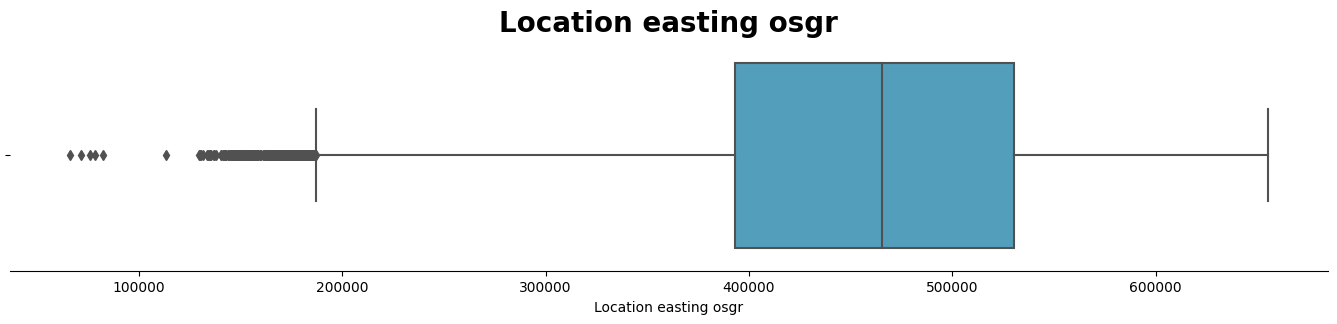

In [25]:
"""
box plot of location_easting_osgr to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(x = accidents_2020['location_easting_osgr'], palette='GnBu_d',)
plt.title('Location easting osgr', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Location easting osgr', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

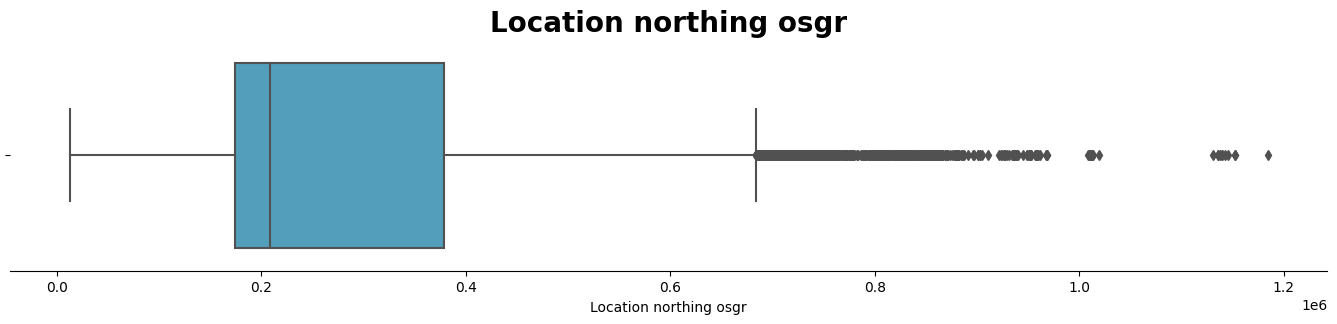

In [26]:
"""
box plot of location_northing_osgr to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(x = accidents_2020['location_northing_osgr'], palette='GnBu_d',)
plt.title('Location northing osgr', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Location northing osgr', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

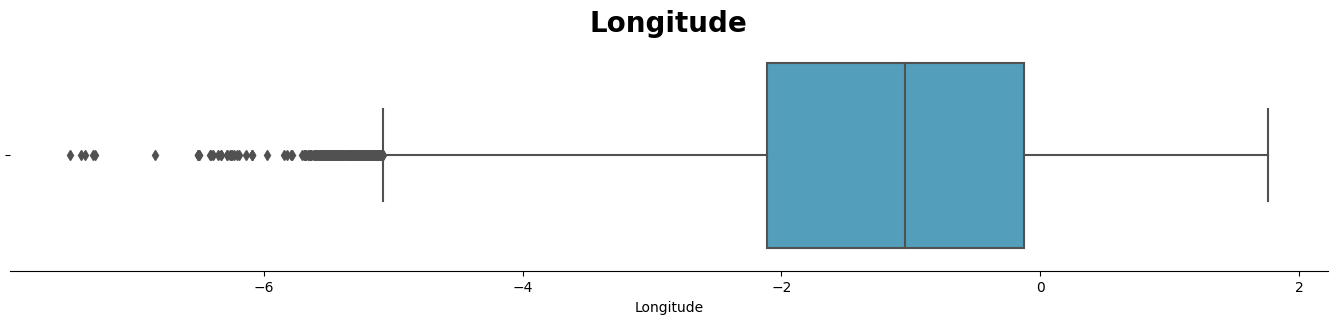

In [27]:
"""
box plot of longitude to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(x = accidents_2020['longitude'], palette='GnBu_d',)
plt.title('Longitude', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Longitude', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

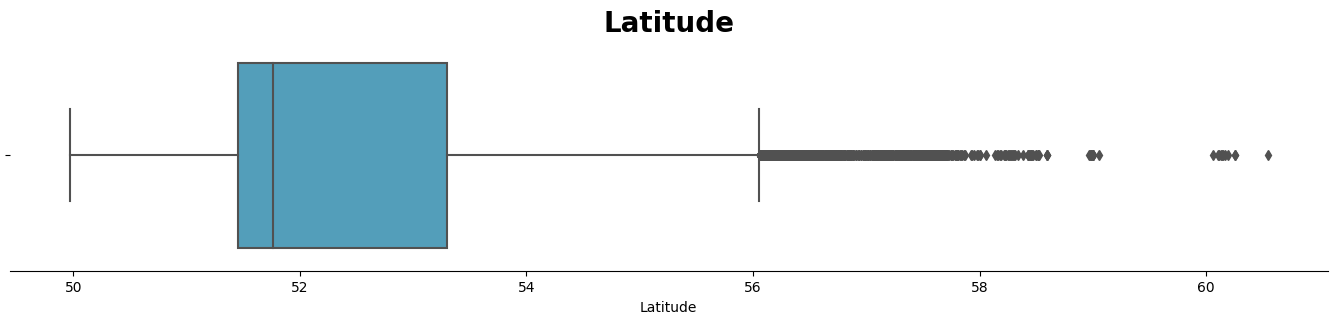

In [28]:
"""
box plot of latitude to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(x = accidents_2020['latitude'], palette='GnBu_d',)
plt.title('Latitude', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Latitude', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

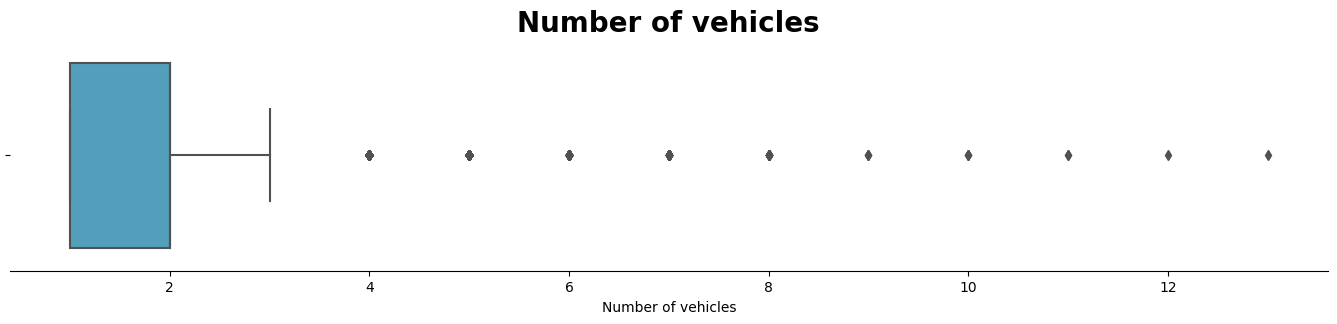

In [29]:
"""
box plot of number of vehicles to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(x = accidents_2020['number_of_vehicles'], palette='GnBu_d',)
plt.title('Number of vehicles', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Number of vehicles', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

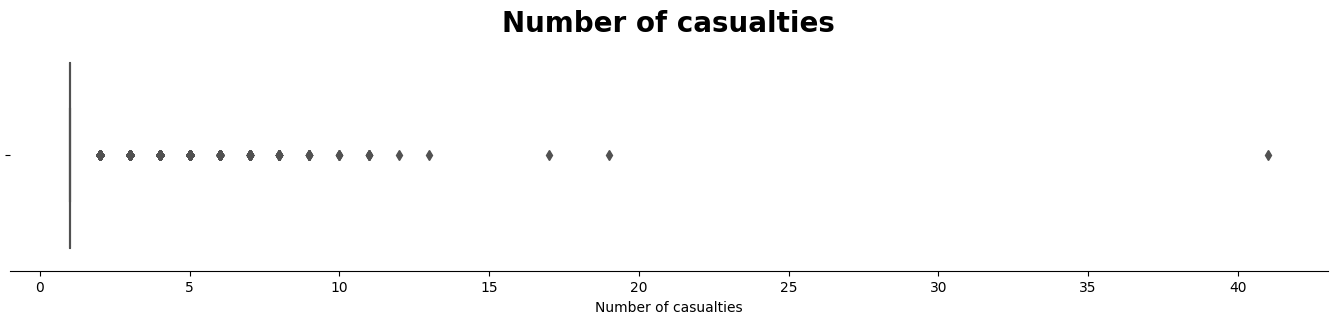

In [30]:
"""
box plot of number of casualties to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(x = accidents_2020['number_of_casualties'], palette='GnBu_d',)
plt.title('Number of casualties', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Number of casualties', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

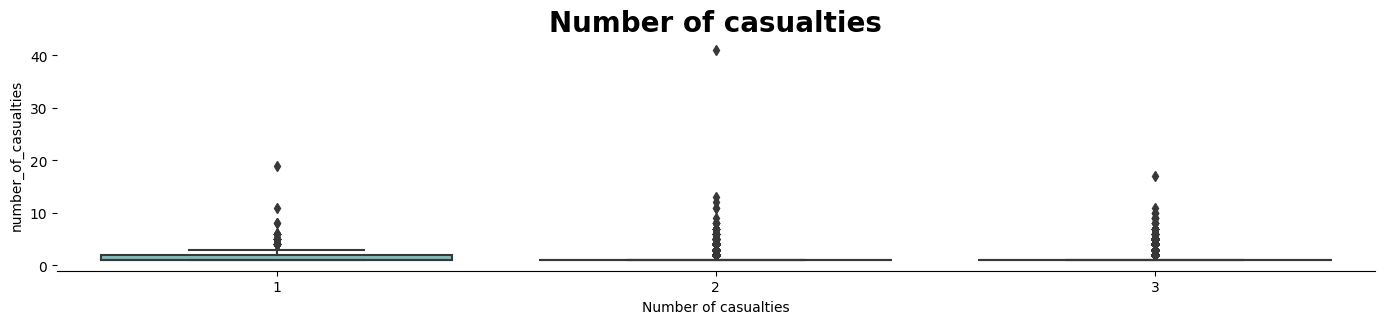

In [31]:
"""
box plot of number of casualties against severity to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(y = accidents_2020['number_of_casualties'],
            x = accidents_2020['accident_severity'],
            palette='GnBu_d',)
plt.title('Number of casualties', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Number of casualties', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

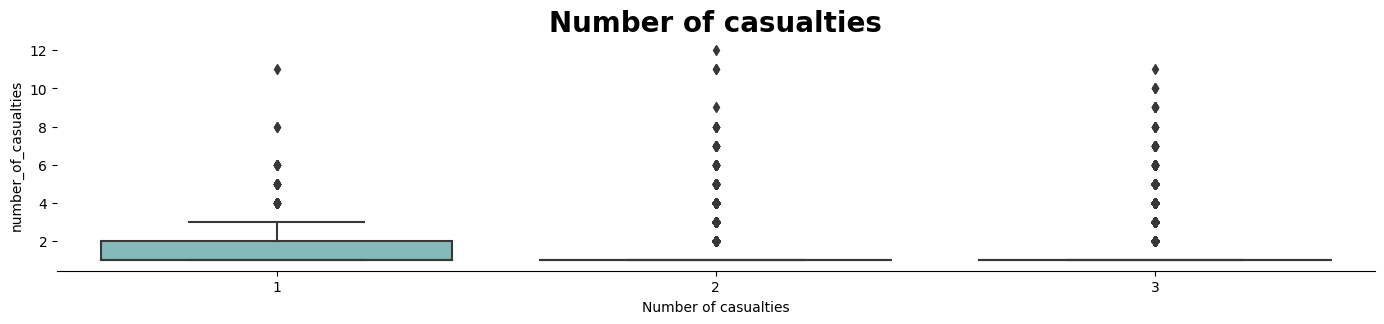

In [32]:
"""
There are clear outliers in the number of casualties column. On the basis of this visual these values will be removed
"""
accidents_2020 = accidents_2020[(accidents_2020['number_of_casualties'] < 13)]
plt.figure(figsize=(17, 3))
sns.boxplot(y = accidents_2020['number_of_casualties'],
            x = accidents_2020['accident_severity'],
            palette='GnBu_d',)
plt.title('Number of casualties', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Number of casualties', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

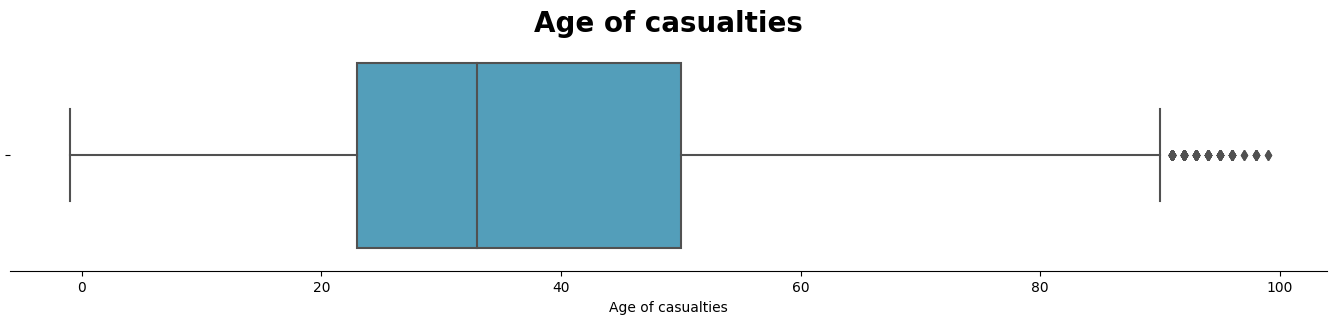

In [33]:
"""
box plot of age of casualties to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(x = casualties_2020['age_of_casualty'],
            palette='GnBu_d',)
plt.title('Age of casualties', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Age of casualties', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

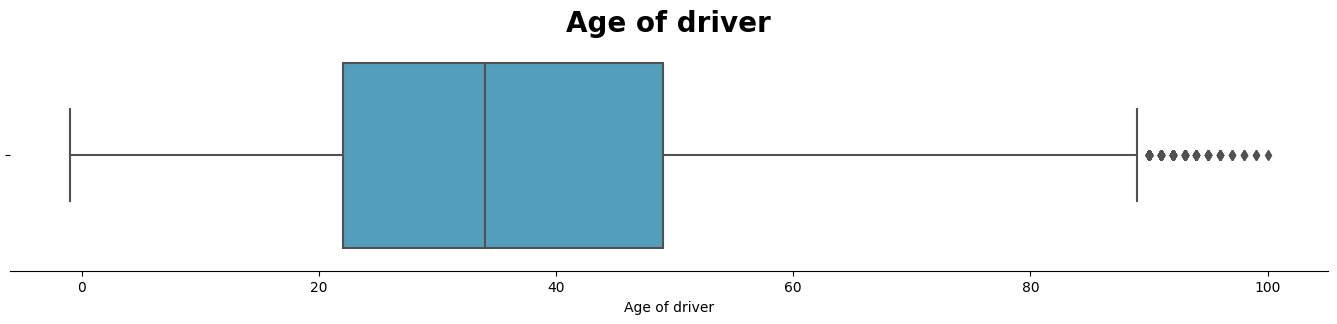

In [34]:
"""
box plot of age of driver to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(x = vehicles_2020['age_of_driver'],
            palette='GnBu_d',)
plt.title('Age of driver', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Age of driver', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

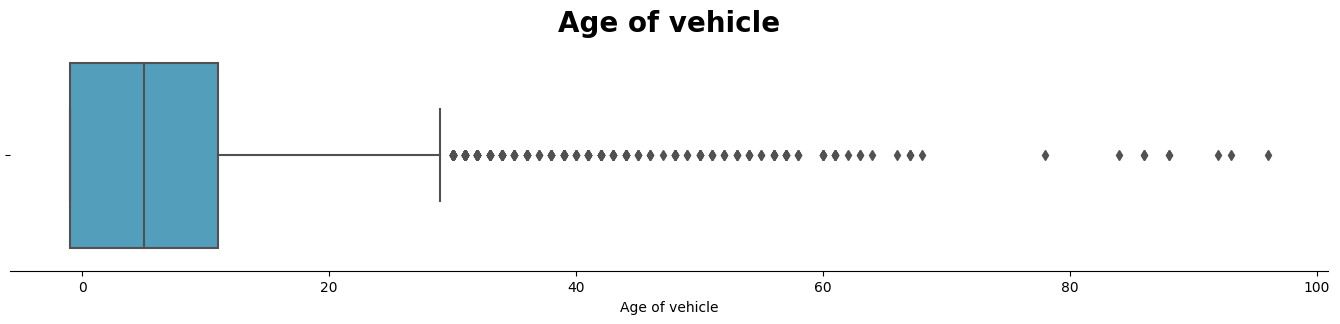

In [35]:
"""
box plot of age of vehicle to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(x = vehicles_2020['age_of_vehicle'],
            palette='GnBu_d',)
plt.title('Age of vehicle', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Age of vehicle', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

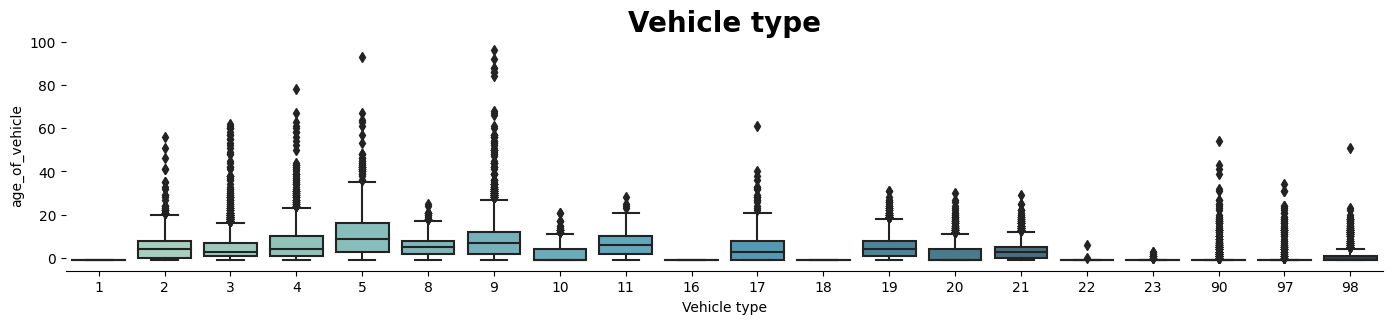

In [36]:
"""
There are outliers in the above, however, based on my knowlegde of cars I know that this might not necessarily be wrong
"""
plt.figure(figsize=(17, 3))
sns.boxplot(y = vehicles_2020['age_of_vehicle'],
            x = vehicles_2020['vehicle_type'],
            palette='GnBu_d',)
plt.title('Vehicle type', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Vehicle type', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

Age of vehicle remains unchanged as older vehicles, such as classics and agricultural vehicles, can be valid despite their age.

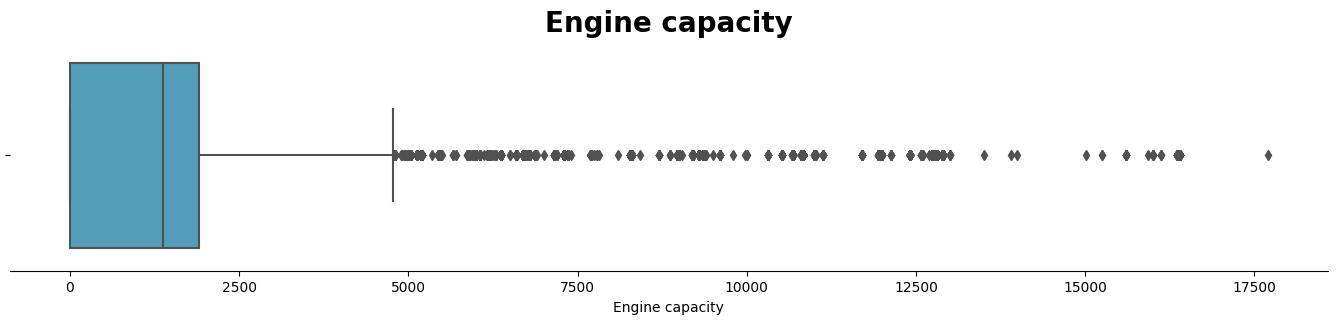

In [37]:
"""
box plot of engine capacity to identify outliers
"""
plt.figure(figsize=(17, 3))
sns.boxplot(x = vehicles_2020['engine_capacity_cc'],
            palette='GnBu_d',)
plt.title('Engine capacity', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Engine capacity', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

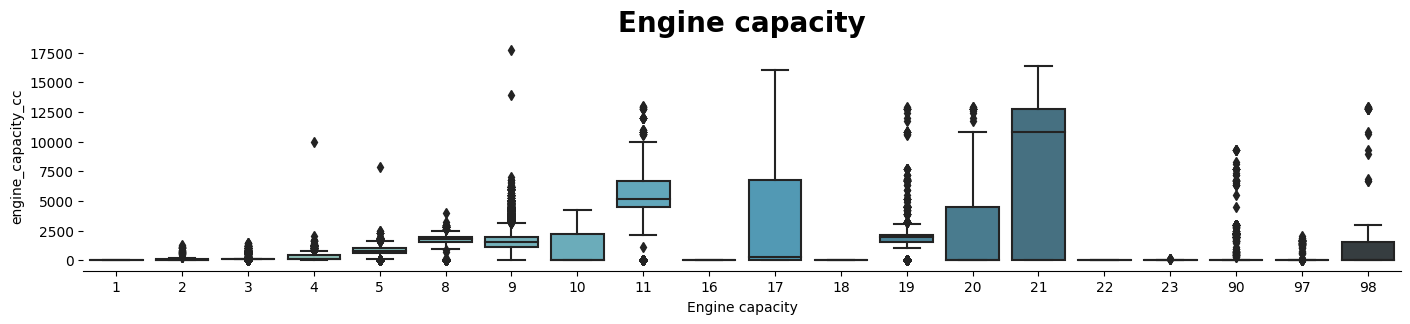

In [38]:
"""
There are outliers in the above
"""
plt.figure(figsize=(17, 3))
sns.boxplot(y = vehicles_2020['engine_capacity_cc'],
            x = vehicles_2020['vehicle_type'],
            palette='GnBu_d',)
plt.title('Engine capacity', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Engine capacity', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

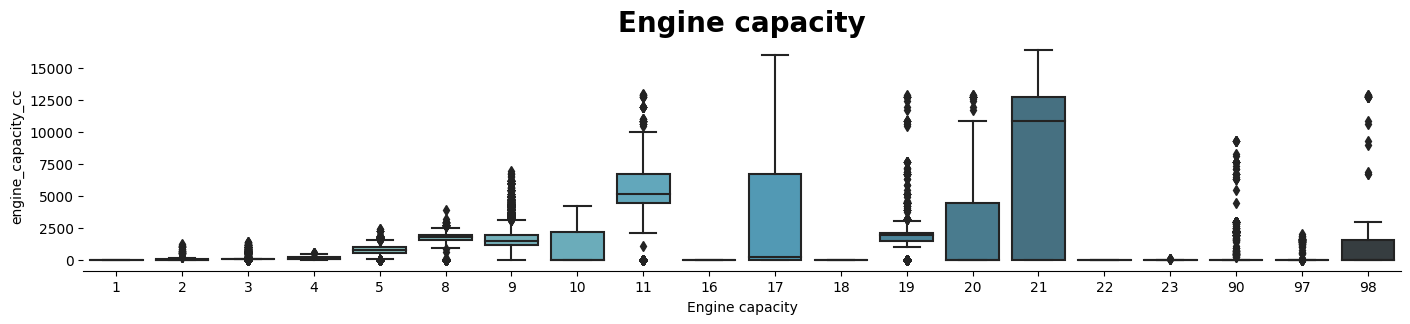

In [39]:
"""
vehicles of class 4 which are motorbikes should be less than 500cc
vehichle of class 5 can be over 500 but this is significantly over
vehicle of type 9 which are cars will be kept below 7500
"""
vehicles_2020 = vehicles_2020[
    ~((vehicles_2020['vehicle_type'] == 4) & (vehicles_2020['engine_capacity_cc'] > 550)) &
    ~((vehicles_2020['vehicle_type'] == 5) & (vehicles_2020['engine_capacity_cc'] > 2500)) &
    ~((vehicles_2020['vehicle_type'] == 9) & (vehicles_2020['engine_capacity_cc'] > 10000))
]


plt.figure(figsize=(17, 3))
sns.boxplot(y = vehicles_2020['engine_capacity_cc'],
            x = vehicles_2020['vehicle_type'],
            palette='GnBu_d',)
plt.title('Engine capacity', fontsize=20, fontweight='bold', color = 'black')
plt.xlabel('Engine capacity', fontsize=10, color = 'black')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

## FEATURE EXTRACTION

### Accident Dataframe

In [40]:
#accidents dataframe head
accidents_2020.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020           10219808               521389.0   
1  2020010220496           2020           10220496               529337.0   
2  2020010228005           2020           10228005               526432.0   
3  2020010228006           2020           10228006               538676.0   
4  2020010228011           2020           10228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  number_of_casualties       date  \
0                  3                   1                     1 2020-02-04   
1                  3                   1                     2 2020-04-27   
2                  3                   1                     1 2020-01-01   
3                  2                   1                     1 2020-01-01   
4                  3                   1                     2 2020-01-01   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            3  09:00                        10                    E09000032   
1            2  13:55                         9                    E09000022   
2            4  01:25                         1                    E09000033   
3            4  01:50                        17                    E09000025   
4            4  02:25                         1                    E09000033   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000032                 6                  0          6   
1               E09000022                 3               3036          6   
2               E09000033                 5                  0          6   
3               E09000025                 3                 11          6   
4               E09000033                 3                 40          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  0   
1           20                9                 2                  6   
2           30                3                 1                  6   
3           30                0                -1                  0   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  9   
1                   0                                  0   
2                   0                                  0   
3                  -1                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                    1   

__1. Period features extracted from Date__

In [41]:
#creating a function which extracts period columns from date and time
def extract_period_info(df):
    df['day'] = pd.to_datetime(df['date']).dt.day
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['year'] = pd.to_datetime(df['date']).dt.year
    df['week_no'] = pd.to_datetime(df['date']).dt.isocalendar().week
    df['datetime'] = pd.to_datetime(df['date'].apply(str)+' '+df['time'])

    # Extracting information from the 'Time' column
    df['hour'] = pd.to_datetime(df['time']).dt.hour

    return df

#using the created function above to extract relevant period values from date and time columns
accidents_2020 = extract_period_info(accidents_2020)
accidents_2020.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020           10219808               521389.0   
1  2020010220496           2020           10220496               529337.0   
2  2020010228005           2020           10228005               526432.0   
3  2020010228006           2020           10228006               538676.0   
4  2020010228011           2020           10228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  number_of_casualties       date  \
0                  3                   1                     1 2020-02-04   
1                  3                   1                     2 2020-04-27   
2                  3                   1                     1 2020-01-01   
3                  2                   1                     1 2020-01-01   
4                  3                   1                     2 2020-01-01   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            3  09:00                        10                    E09000032   
1            2  13:55                         9                    E09000022   
2            4  01:25                         1                    E09000033   
3            4  01:50                        17                    E09000025   
4            4  02:25                         1                    E09000033   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000032                 6                  0          6   
1               E09000022                 3               3036          6   
2               E09000033                 5                  0          6   
3               E09000025                 3                 11          6   
4               E09000033                 3                 40          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  0   
1           20                9                 2                  6   
2           30                3                 1                  6   
3           30                0                -1                  0   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  9   
1                   0                                  0   
2                   0                                  0   
3                  -1                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                    1   

## COMBINING ALL THE DATAFRAMES INTO A SINGLE DATAFRAME
__Merging all dataframes into a single one, as the necessary data for analysis is spread across four separate dataframes.__

In [42]:
#combining the dataframes separately
accidents_casualties = pd.merge(accidents_2020, casualties_2020, on = 'accident_index', how = 'inner',indicator=False)
accidents_vehicles = pd.merge(accidents_2020, vehicles_2020, on = 'accident_index', how = 'inner',indicator=False)
casualties_vehicles = pd.merge(casualties_2020, vehicles_2020, on = 'accident_index', how = 'inner',indicator=False)

#combining the accidents, casualties and vehicles dataframes
acccidents_casualties_vehicles = pd.merge(accidents_casualties, vehicles_2020, on = 'accident_index', how = 'inner')


#print the length of our dataframes
print ('Length of accidents dataframe:',len(accidents_2020))
print ('Length of casualties dataframe:',len(casualties_2020))
print ('Length of vehicles dataframe:',len(vehicles_2020))
print('\n')

#print the number of unique values in our new dataframes
print ('# of unique accident index values in the accidents dataframe:', len(accidents_2020['accident_index'].unique()))
print ('# of unique accident index values in the casualties dataframe:', len(casualties_2020['accident_index'].unique()))
print ('# of unique accident index values in the vehicles dataframe:', len(vehicles_2020['accident_index'].unique()))
print('\n')

#length of the dataframes
print ('Length of accidents and casualties dataframe:',len(accidents_casualties))
print ('Length of accidents and vehicles dataframe:',len(accidents_vehicles))
print ('Length of casualties and vehicles dataframe:',len(casualties_vehicles))
print('\n')

#print the number of unique values in our new dataframes
print ('# of unique accident index values in the accidents_casualties df:', len(accidents_casualties['accident_index'].unique()))
print ('# of unique accident index values in the accidents_vehicles df:', len(accidents_vehicles['accident_index'].unique()))
print ('# of unique accident index values in the casualties_vehicles df:', len(casualties_vehicles['accident_index'].unique()))
print ('# of unique accident index values in the acccidents_casualties_vehicles df:', len(acccidents_casualties_vehicles['accident_index'].unique()))
print('\n')

Length of accidents dataframe: 91181
Length of casualties dataframe: 115584
Length of vehicles dataframe: 167159


# of unique accident index values in the accidents dataframe: 91181
# of unique accident index values in the casualties dataframe: 91199
# of unique accident index values in the vehicles dataframe: 91155


Length of accidents and casualties dataframe: 96482
Length of accidents and vehicles dataframe: 161244
Length of casualties and vehicles dataframe: 176833


# of unique accident index values in the accidents_casualties df: 74797
# of unique accident index values in the accidents_vehicles df: 87803
# of unique accident index values in the casualties_vehicles df: 71441
# of unique accident index values in the acccidents_casualties_vehicles df: 71423




##  1. When do accidents happen?
1. Hours of the day
2. Days of the week

__<u>Function to create new dataframes quickly__

In [43]:
"""
1/ The idea behind this function is to be able to quickly create new dataframes
2/ These dataframes will calculate count, average and % of total
3/ These statistics are calcuated depending on what column of the data is being looked at
"""

#Function to create dataframes quickly
#The function takes 3 arguments of dataframe, and 2 columns in the dataset
def df_table_extract(df, column_1, column_2):
    # Calculate the count of accidents for each value in column_1
    table_name = df[column_1].value_counts().sort_index().to_frame().reset_index()
    table_name.columns = [column_1, column_2]
    
    #calculate the total accidents
    total_count = table_name[column_2].sum()
    
    # Calculate the percentage split for each value in column_1
    table_name['% share'] = round((table_name[column_2] / total_count) * 100, 2)

    #calculate the average number of accidents based on different periods
    if column_1 == 'hour':
        total_days = df['datetime'].dt.date.nunique()
        table_name['Average Accidents'] = round(table_name[column_2] / total_days,2)
    elif column_1 == 'day_of_week':
        total_weeks = df['week_no'].nunique()
        table_name['Average Accidents'] = round(table_name[column_2] / total_weeks,2)

    return table_name

### Hours of the day when accidents happen

In [44]:
#using the created function to calculate hours of the day when accidents happen
df_table_extract(accidents_2020, 'hour', 'count')

hour  count  % share  Average Accidents
0      0   1188     1.30               3.25
1      1    915     1.00               2.50
2      2    658     0.72               1.80
3      3    566     0.62               1.55
4      4    508     0.56               1.39
5      5    854     0.94               2.33
6      6   1830     2.01               5.00
7      7   3735     4.10              10.20
8      8   5263     5.77              14.38
9      9   3916     4.29              10.70
10    10   4172     4.58              11.40
11    11   4811     5.28              13.14
12    12   5395     5.92              14.74
13    13   5741     6.30              15.69
14    14   6244     6.85              17.06
15    15   7361     8.07              20.11
16    16   7380     8.09              20.16
17    17   7813     8.57              21.35
18    18   6615     7.25              18.07
19    19   5047     5.54              13.79
20    20   3713     4.07              10.14
21    21   3105     3.41               8.48
22    22   2555     2.80               6.98
23    23   1796     1.97               4.91

### Days of the week when accidents happen

In [45]:
#using the created function to calculate days of the week when accidents happen
df_table_extract(accidents_2020, 'day_of_week', 'number_of_accidents')

day_of_week  number_of_accidents  % share  Average Accidents
0            1                10314    11.31             194.60
1            2                12772    14.01             240.98
2            3                13265    14.55             250.28
3            4                13558    14.87             255.81
4            5                14052    15.41             265.13
5            6                14886    16.33             280.87
6            7                12334    13.53             232.72

### Months of the year when accidents happen

In [46]:
#using the created function to calculate months of the year when accidents happen
df_table_extract(accidents_2020, 'month', 'number_of_accidents')

month  number_of_accidents  % share
0       1                 9590    10.52
1       2                 8542     9.37
2       3                 6548     7.18
3       4                 3298     3.62
4       5                 5598     6.14
5       6                 6720     7.37
6       7                 8157     8.95
7       8                 8873     9.73
8       9                 9255    10.15
9      10                 8865     9.72
10     11                 7608     8.34
11     12                 8127     8.91

__<u>Function to help plot certain charts quickly__

In [47]:
"""
1/ Certain types of charts will be plotted regularly for this project
2/ The type of charts are typically countplots
3/ The idea for this function is to avoid having to do this code for all the charts
4/ All components required for a countplot are considered and included in the function
"""

#function to plot common count plot charts
#The function considers inputs such as variable name, dataframe,whether plot should be on x or y axis
#order of the values, labels, chart title, x-axis title, y-axis title, whether to add counts in the bars
def plot_count_plot_no_hue(var=None, df=None, x=None, y=None,
                           order_code=None, labels_name=None,
                           chart_title=None, x_label_title=None,
                           y_label_title=None, add_values=False,
                           *args, **kwargs):
    
    # Style and size
    sns.set_style('darkgrid') 
    plt.figure(figsize=(kwargs.get('i', 20), kwargs.get('j', 10)))
    
    # Selected chart properties
    plt.tick_params(bottom=True, left=True)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    sns.despine(top=False, right=True, left=False, bottom=False)
    
    #whether count should be on x or y axis
    if x is not None and y is None:
        # Create the count plot with x-axis
        var = sns.countplot(x=x, data=df, order=order_code, palette='GnBu_d',
                            edgecolor='black', alpha=0.75, linewidth=1)
        var.set_xticklabels(labels_name, fontweight='bold', rotation = None)
        plt.xlabel(x_label_title, fontsize=15, fontweight='bold')
        plt.ylabel(y_label_title, fontsize=15, fontweight='bold')
        
    elif x is None and y is not None:
        #count plot with y-axis
        var = sns.countplot(y=y, data=df, order=order_code, palette='GnBu_d',
                            edgecolor='black', alpha=0.75, linewidth=1)
        var.set_yticklabels(labels_name, fontweight='bold')
        plt.ylabel(y_label_title, fontsize=15, fontweight='bold')
        plt.xlabel(x_label_title, fontsize=15, fontweight='bold')
        
    else:
        raise ValueError("Either 'x' or 'y' should be provided, not both.")
    
    plt.title(chart_title, fontsize=25, fontweight='bold')
    
    
    # Add values to the bars
    if add_values:
        if x is not None and y is None:
            for p in var.patches:
                var.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',
                             fontsize=12, fontweight='bold')
        elif x is None and y is not None:
            for p in var.patches:
                var.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.),
                             ha = 'center', va = 'center', xytext = (-12, 0), textcoords = 'offset points',
                             fontsize=12)
    
    plt.show()

__Visual showing hours of the day when accidents happen__

In [48]:
#importing matplotlib libraries
import matplotlib as matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

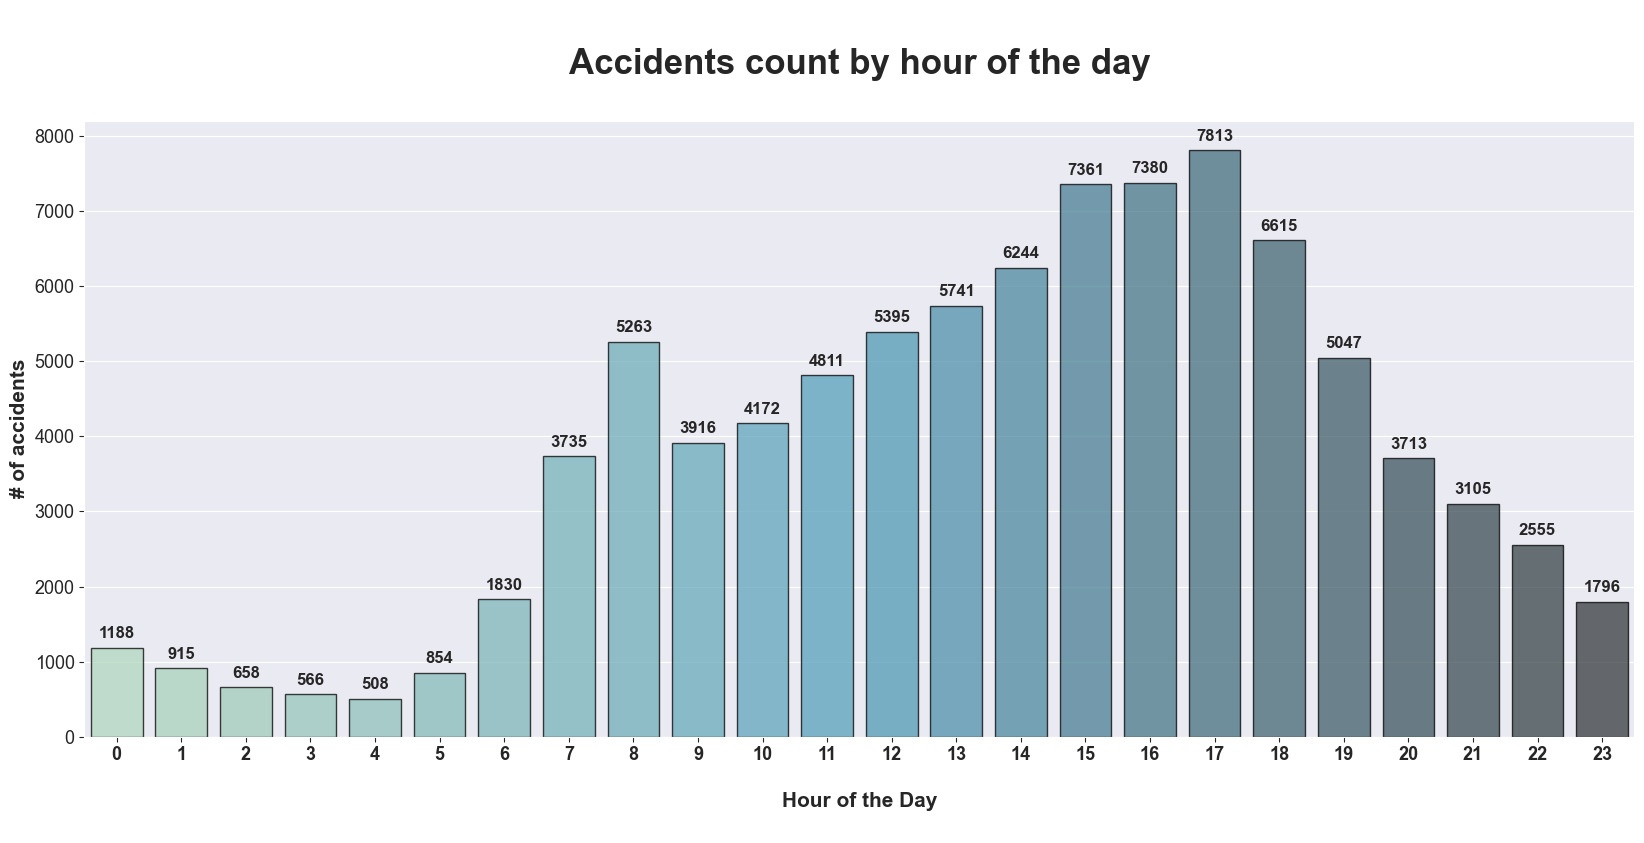

In [49]:
#calling the function to plot chart
#order of hour code
hour_code = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

#calling the function to plot the chart
plot_count_plot_no_hue(var = 'accidents_hour', df = accidents_2020,
                       x = accidents_2020.hour, order_code = hour_code,
                       labels_name = hour_code,
                       chart_title ='\nAccidents count by hour of the day\n',
                       x_label_title ='\nHour of the Day\n', y_label_title ='# of accidents',
                       i = 20, j = 8, add_values=True)

__Visual showing days of the week when accidents happen__

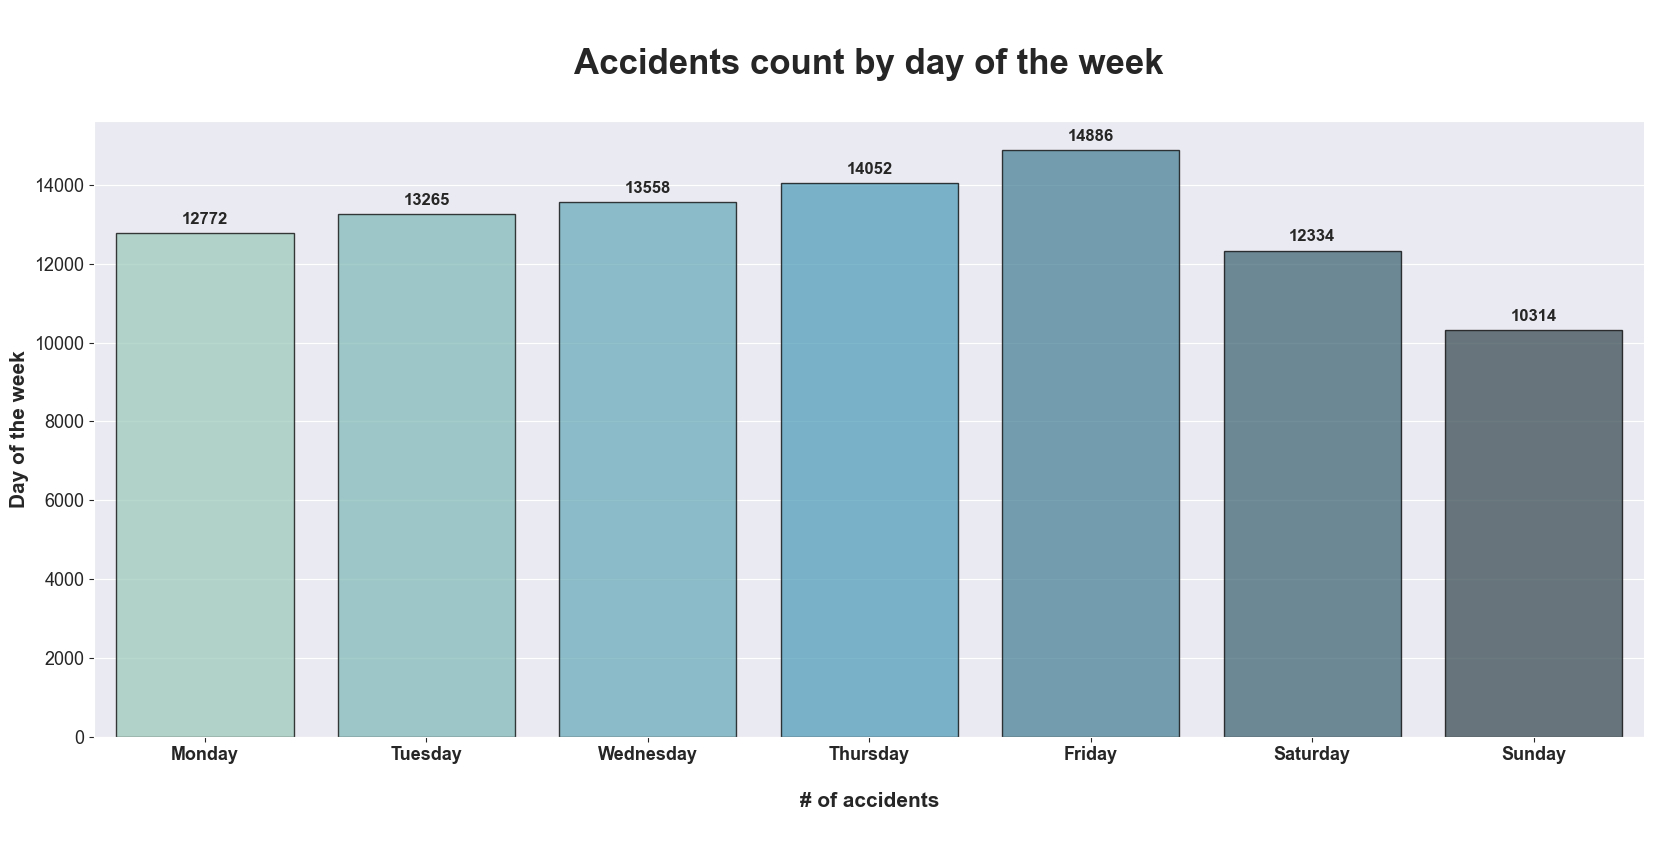

In [50]:
#code for weekday and order of how days should appear
week_code = [2,3,4,5,6,7,1]
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#calling the function to plot the chart
plot_count_plot_no_hue(var = 'accidents_day', df = accidents_2020,
                       x = accidents_2020.day_of_week, order_code = week_code,
                       labels_name = week_day,
                       chart_title ='\nAccidents count by day of the week\n',
                       x_label_title ='\n# of accidents\n', y_label_title ='Day of the week',
                       i = 20, j = 8, add_values=True)

__Visual showing months of the year when accidents happen__

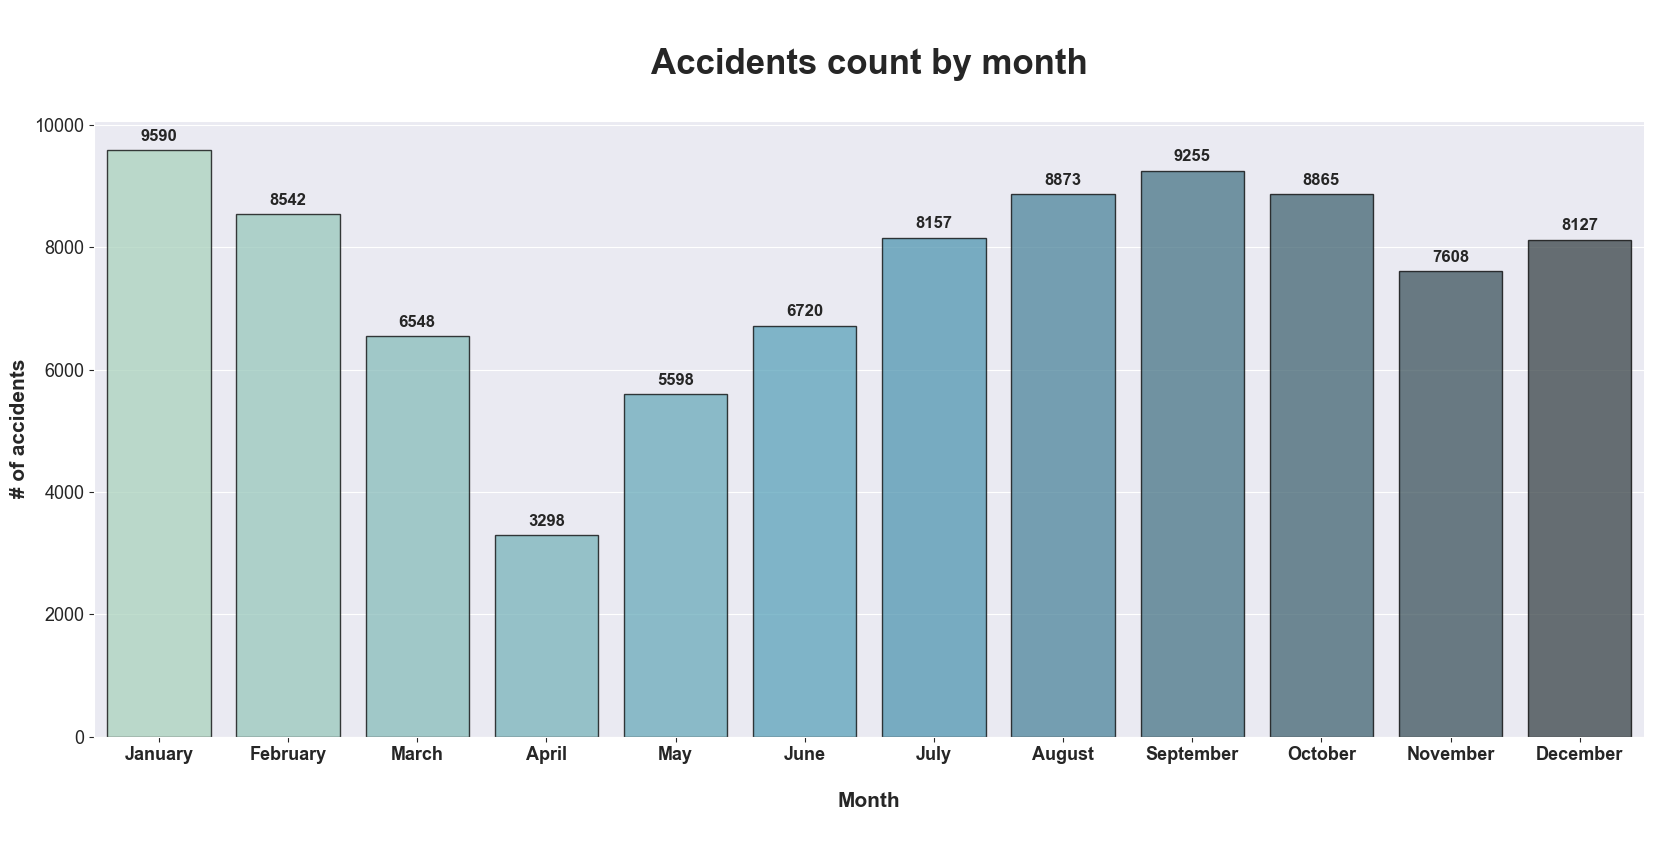

In [51]:
#code for month and order of how months should appear
month_code = [1,2,3,4,5,6,7,8,9,10,11,12]
month_ticks = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November','December']

#calling the function to plot the chart
plot_count_plot_no_hue(var = 'accidents_day', df = accidents_2020,
                       x = accidents_2020.month, order_code = month_code,
                       labels_name = month_ticks,
                       chart_title ='\nAccidents count by month\n',
                       x_label_title ='\nMonth\n', y_label_title ='# of accidents',
                       i = 20, j = 8, add_values=True)

## 2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.


__A dataframe for motorbikes will be created for this analysis.__
__As suggested in the assignment brief the focus will be on:__
1. Motorcycle over 50cc and up to 125cc with code 3
2. Motorcycle over 125cc and up to 500cc with code 4
3. Motorcycle over 500cc with code 5

__Motorcycle 50cc and under with code 2 is excluded from the analysis__

In [52]:
#creating a dataframe for bikes from the 
motorbikes_2020 = accidents_vehicles[accidents_vehicles['vehicle_type'].isin([3, 4, 5])]
motorbikes_2020.head()

accident_index  accident_year_x accident_reference_x  \
12  2020010228020             2020             10228020   
33  2020010228086             2020             10228086   
36  2020010228097             2020             10228097   
58  2020010228148             2020             10228148   
77  2020010228207             2020             10228207   

    location_easting_osgr  location_northing_osgr  longitude   latitude  \
12               529718.0                192342.0  -0.127840  51.614971   
33               531043.0                176304.0  -0.114680  51.470537   
36               528428.0                179923.0  -0.150994  51.503659   
58               518467.0                185248.0  -0.292651  51.553691   
77               527038.0                170583.0  -0.174362  51.420033   

    police_force  accident_severity  number_of_vehicles  number_of_casualties  \
12             1                  3                   2                     1   
33             1                  3                   1                     1   
36             1                  3                   2                     1   
58             1                  3                   1                     1   
77             1                  3                   2                     1   

         date  day_of_week   time  local_authority_district  \
12 2020-01-01            4  03:25                        32   
33 2020-01-01            4  14:00                         9   
36 2020-01-01            4  14:37                         1   
58 2020-01-01            4  19:05                        28   
77 2020-01-01            4  14:29                        22   

   local_authority_ons_district local_authority_highway  first_road_class  \
12                    E09000010               E09000010                 3   
33                    E09000022               E09000022                 6   
36                    E09000033               E09000033                 3   
58                    E09000005               E09000005                 3   
77                    E09000024               E09000024                 6   

    first_road_number  road_type  speed_limit  junction_detail  \
12                406          3           30                6   
33                  0          6           20                0   
36               4202          3           30                0   
58                404          6           30                3   
77                  0          6           20               99   

    junction_control  second_road_class  second_road_number  \
12                 2                  3                 406   
33                -1                  0                  -1   
36                -1                  0                  -1   
58                 2                  3                4089   
77                 9                  6                   0   

    pedestrian_crossing_human_control  \
12                                  0   
33                                  0   
36                                  0   
58                                  2   
77                                  0   

    pedestrian_crossing_physical_facilities  light_conditions  \
12                                        5                 4   
33                                        0                 1   
36                                        0                 1   
58                                        4                 4   
77                                        0                 1   

    weather_conditions  road_surface_conditions  special_conditions_at_site  \
12                   1                        1                           0   
33                   1                        1                           0   
36                   1                        1                           0   
58                   1                        1                           0   
77                   1                        1            

In [53]:
#info method
motorbikes_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12239 entries, 12 to 161241
Data columns (total 69 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               12239 non-null  object        
 1   accident_year_x                              12239 non-null  int64         
 2   accident_reference_x                         12239 non-null  object        
 3   location_easting_osgr                        12239 non-null  float64       
 4   location_northing_osgr                       12239 non-null  float64       
 5   longitude                                    12239 non-null  float64       
 6   latitude                                     12239 non-null  float64       
 7   police_force                                 12239 non-null  int64         
 8   accident_severity                            12239 non-null  int64         
 9 

### Motorbikes: Hours of the day when accidents happen

In [54]:
#using the created function to calculate hours of the day when accidents happen
df_table_extract(motorbikes_2020, 'hour', 'count')

hour  count  % share  Average Accidents
0      0     91     0.74               0.25
1      1     86     0.70               0.23
2      2     42     0.34               0.11
3      3     36     0.29               0.10
4      4     39     0.32               0.11
5      5    107     0.87               0.29
6      6    232     1.90               0.63
7      7    503     4.11               1.37
8      8    423     3.46               1.16
9      9    372     3.04               1.02
10    10    467     3.82               1.28
11    11    593     4.85               1.62
12    12    733     5.99               2.00
13    13    909     7.43               2.48
14    14    919     7.51               2.51
15    15    967     7.90               2.64
16    16   1056     8.63               2.89
17    17   1210     9.89               3.31
18    18   1007     8.23               2.75
19    19    802     6.55               2.19
20    20    625     5.11               1.71
21    21    480     3.92               1.31
22    22    329     2.69               0.90
23    23    211     1.72               0.58

### Motorbikes: Days of the week when accidents happen

In [55]:
#using the created function to calculate days of the week when accidents happen
df_table_extract(motorbikes_2020, 'day_of_week', 'number_of_accidents')

day_of_week  number_of_accidents  % share  Average Accidents
0            1                 1628    13.30              30.72
1            2                 1612    13.17              30.42
2            3                 1664    13.60              31.40
3            4                 1725    14.09              32.55
4            5                 1894    15.48              35.74
5            6                 2008    16.41              37.89
6            7                 1708    13.96              32.23

### Motorbikes: Months of the year when accidents happen

In [56]:
#using the created function to calculate months of the year when accidents happen
df_table_extract(motorbikes_2020, 'month', 'number_of_accidents')

month  number_of_accidents  % share
0       1                 1009     8.24
1       2                  806     6.59
2       3                  872     7.12
3       4                  526     4.30
4       5                  946     7.73
5       6                 1074     8.78
6       7                 1327    10.84
7       8                 1426    11.65
8       9                 1450    11.85
9      10                  982     8.02
10     11                  909     7.43
11     12                  912     7.45

__Motorbikes accidents visual: hour of the day when accidents happen__

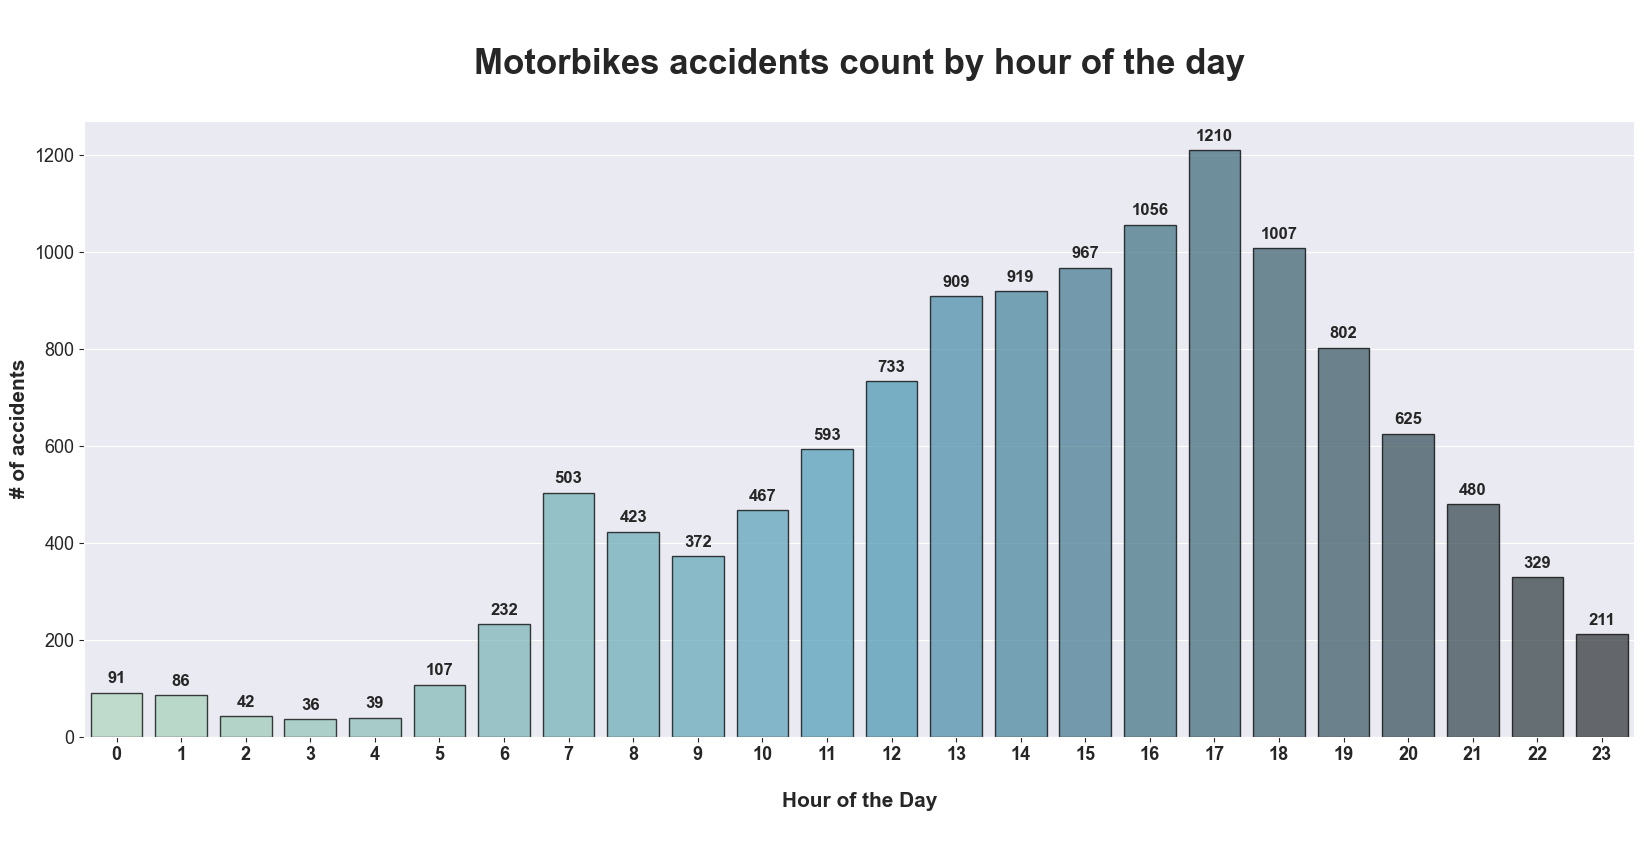

In [57]:
#calling the function to plot chart
plot_count_plot_no_hue(var = 'accidents_hour', df = motorbikes_2020,
                       x = motorbikes_2020.hour, order_code = hour_code,
                       labels_name = hour_code,
                       chart_title ='\nMotorbikes accidents count by hour of the day\n',
                       x_label_title ='\nHour of the Day\n', y_label_title ='# of accidents',
                       i = 20, j = 8, add_values=True)

__Motorbikes accidents visual: day of the week when accidents happen__

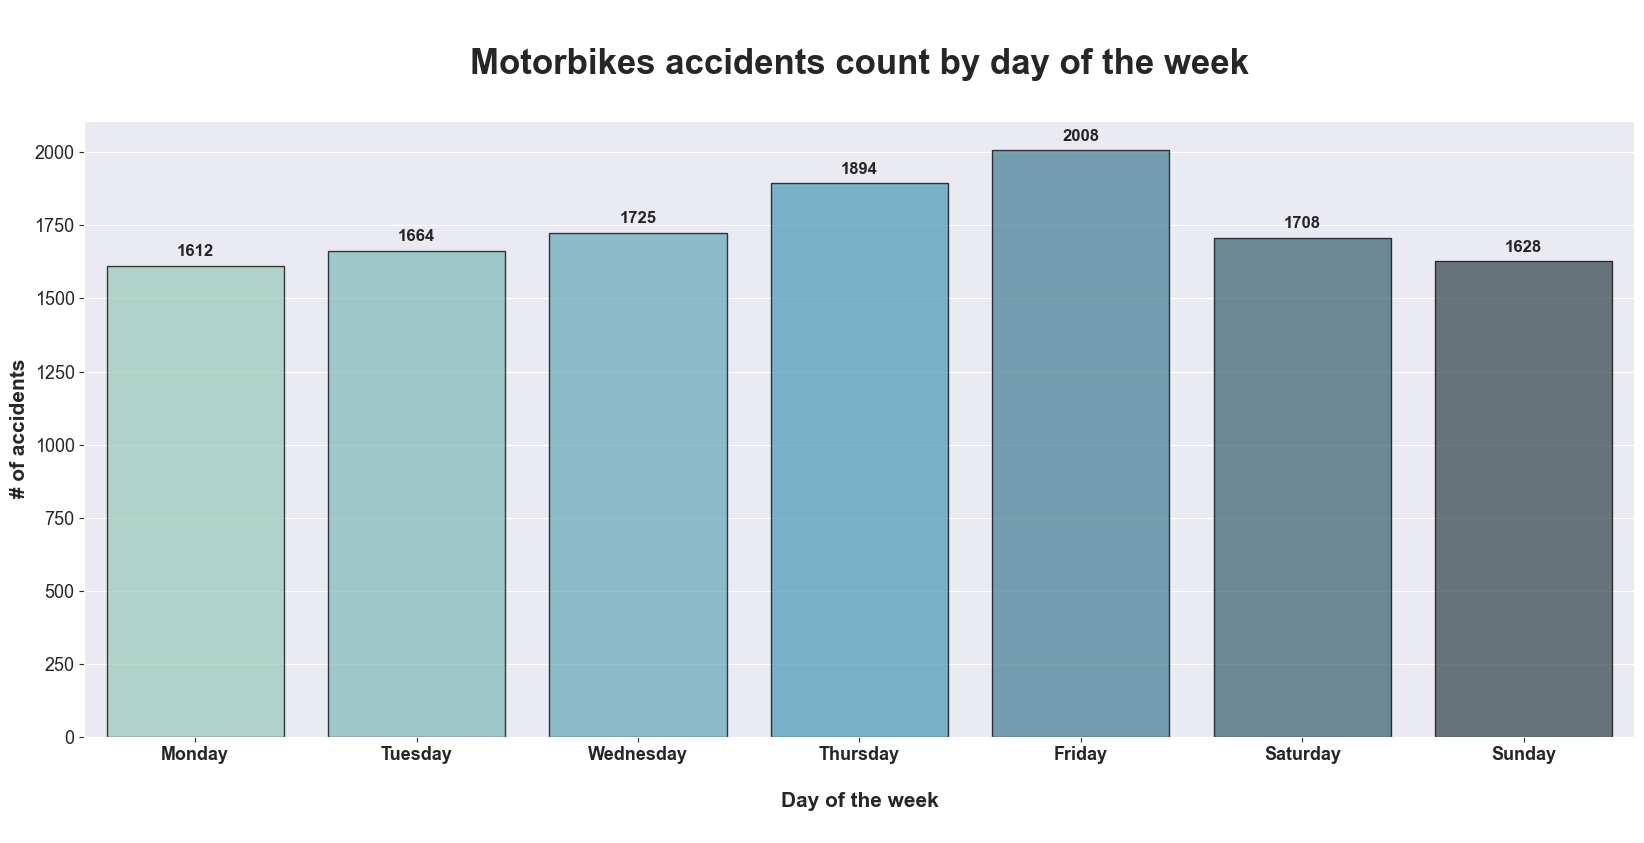

In [58]:
#calling the function to plot the chart
plot_count_plot_no_hue(var = 'accidents_day', df = motorbikes_2020,
                       x = motorbikes_2020.day_of_week, order_code = week_code,
                       labels_name = week_day,
                       chart_title ='\nMotorbikes accidents count by day of the week\n',
                       x_label_title ='\nDay of the week\n', y_label_title ='# of accidents',
                       i = 20, j = 8, add_values=True)

__Motorbikes accidents visual: accidents by month__

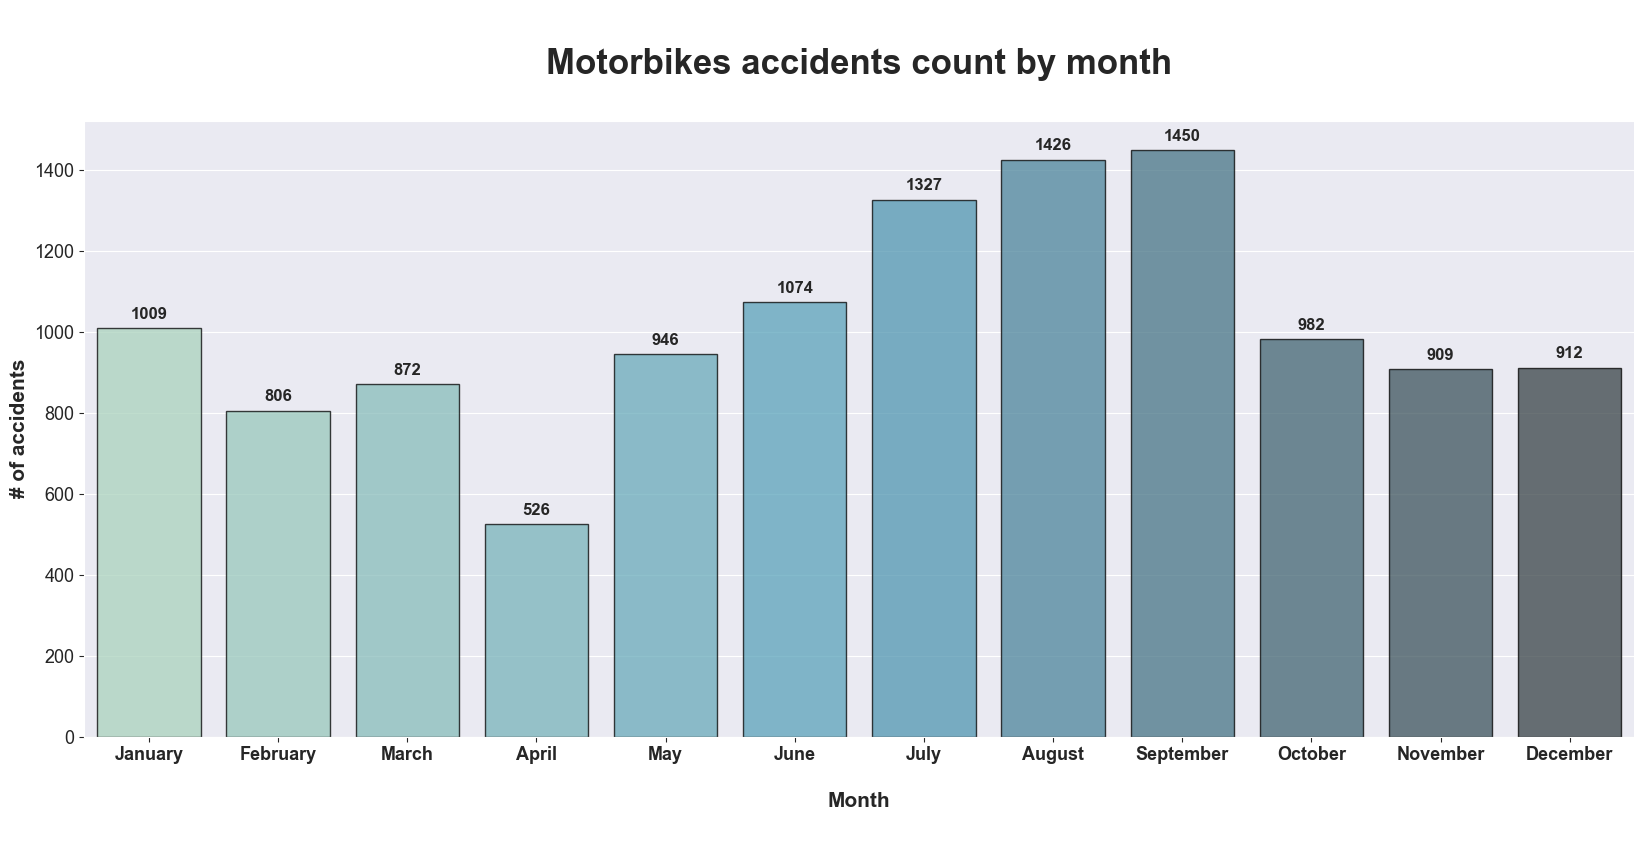

In [59]:
#calling the function to plot the chart
plot_count_plot_no_hue(var = 'accidents_day', df = motorbikes_2020,
                       x = motorbikes_2020.month, order_code = month_code,
                       labels_name = month_ticks,
                       chart_title ='\nMotorbikes accidents count by month\n',
                       x_label_title ='\nMonth\n', y_label_title ='# of accidents',
                       i = 20, j = 8, add_values=True)

## 3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [60]:
#creating a dataframe for bikes from the 
pedestrians_2020 = accidents_casualties[(accidents_casualties['casualty_class'] == 3)]
pedestrians_2020.head()

accident_index  accident_year_x accident_reference_x  \
13  2020010274921             2020            010274921   
32  2020010274955             2020            010274955   
36  2020010274962             2020            010274962   
37  2020010274963             2020            010274963   
38  2020010274966             2020            010274966   

    location_easting_osgr  location_northing_osgr  longitude   latitude  \
13               535917.0                174104.0  -0.045395  51.449617   
32               534719.0                195750.0  -0.054343  51.644421   
36               535355.0                172912.0  -0.053933  51.439040   
37               532368.0                166381.0  -0.099319  51.381053   
38               540385.0                184146.0   0.022854  51.538766   

    police_force  accident_severity  number_of_vehicles  number_of_casualties  \
13             1                  3                   1                     1   
32             1                  3                   1                     1   
36             1                  3                   1                     1   
37             1                  3                   1                     1   
38             1                  3                   1                     1   

         date  day_of_week   time  local_authority_district  \
13 2020-10-20            3  18:00                         7   
32 2020-10-21            4  06:32                        32   
36 2020-10-21            4  07:45                         7   
37 2020-10-21            4  07:20                        20   
38 2020-10-21            4  08:40                        17   

   local_authority_ons_district local_authority_highway  first_road_class  \
13                    E09000023               E09000023                 4   
32                    E09000010               E09000010                 5   
36                    E09000023               E09000023                 3   
37                    E09000008               E09000008                 3   
38                    E09000025               E09000025                 3   

    first_road_number  road_type  speed_limit  junction_detail  \
13                238          2           30                0   
32                  0          6           30                3   
36               2216          7           30                3   
37                212          9           30                0   
38                114          6           30                0   

    junction_control  second_road_class  second_road_number  \
13                -1                  0                  -1   
32                 4                  6                   0   
36                 2                  3                 205   
37                -1                  0                  -1   
38                -1                  0                  -1   

    pedestrian_crossing_human_control  \
13                                  9   
32                                  0   
36                                  9   
37                                  0   
38                                  0   

    pedestrian_crossing_physical_facilities  light_conditions  \
13                                        1                 1   
32                                        0                 4   
36                                        5                 1   
37                                        5                 1   
38                                        1                 1   

    weather_conditions  road_surface_conditions  special_conditions_at_site  \
13                   1                        1                           0   
32                   2                        1                           0   
36                   2                        2                           0   
37                   2                        2                           0   
38                   2                        9            

In [61]:
#info
pedestrians_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12016 entries, 13 to 96481
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               12016 non-null  object        
 1   accident_year_x                              12016 non-null  int64         
 2   accident_reference_x                         12016 non-null  object        
 3   location_easting_osgr                        12016 non-null  float64       
 4   location_northing_osgr                       12016 non-null  float64       
 5   longitude                                    12016 non-null  float64       
 6   latitude                                     12016 non-null  float64       
 7   police_force                                 12016 non-null  int64         
 8   accident_severity                            12016 non-null  int64         
 9  

### Pedestrian Casualties: Hours of the day when accidents happen

In [62]:
#using the created function to calculate hours of the day when accidents happen
df_table_extract(pedestrians_2020, 'hour', 'count')

hour  count  % share  Average Accidents
0      0    138     1.15               0.38
1      1    103     0.86               0.28
2      2     60     0.50               0.16
3      3     66     0.55               0.18
4      4     37     0.31               0.10
5      5     58     0.48               0.16
6      6    131     1.09               0.36
7      7    395     3.29               1.08
8      8    890     7.41               2.43
9      9    484     4.03               1.32
10    10    542     4.51               1.48
11    11    605     5.03               1.65
12    12    659     5.48               1.80
13    13    660     5.49               1.80
14    14    841     7.00               2.30
15    15   1431    11.91               3.91
16    16   1091     9.08               2.98
17    17   1053     8.76               2.88
18    18    924     7.69               2.52
19    19    641     5.33               1.75
20    20    414     3.45               1.13
21    21    322     2.68               0.88
22    22    295     2.46               0.81
23    23    176     1.46               0.48

### Pedestrian Casualties: Days of the week when accidents happen

In [63]:
#using the created function to calculate days of the week when accidents happen
df_table_extract(pedestrians_2020, 'day_of_week', 'number_of_accidents')

day_of_week  number_of_accidents  % share  Average Accidents
0            1                  979     8.15              18.47
1            2                 1804    15.01              34.04
2            3                 1823    15.17              34.40
3            4                 1832    15.25              34.57
4            5                 1917    15.95              36.17
5            6                 2124    17.68              40.08
6            7                 1537    12.79              29.00

### Pedestrian Casualties: Months of the year when accidents happen

In [64]:
#using the created function to calculate months of the year when accidents happen
df_table_extract(pedestrians_2020, 'month', 'number_of_accidents')

month  number_of_accidents  % share
0       1                 1613    13.42
1       2                 1356    11.28
2       3                  911     7.58
3       4                  267     2.22
4       5                  450     3.75
5       6                  525     4.37
6       7                  738     6.14
7       8                  788     6.56
8       9                 1099     9.15
9      10                 1321    10.99
10     11                 1367    11.38
11     12                 1581    13.16

__Pedestrian casualties visual: hour of the day when accidents happen__

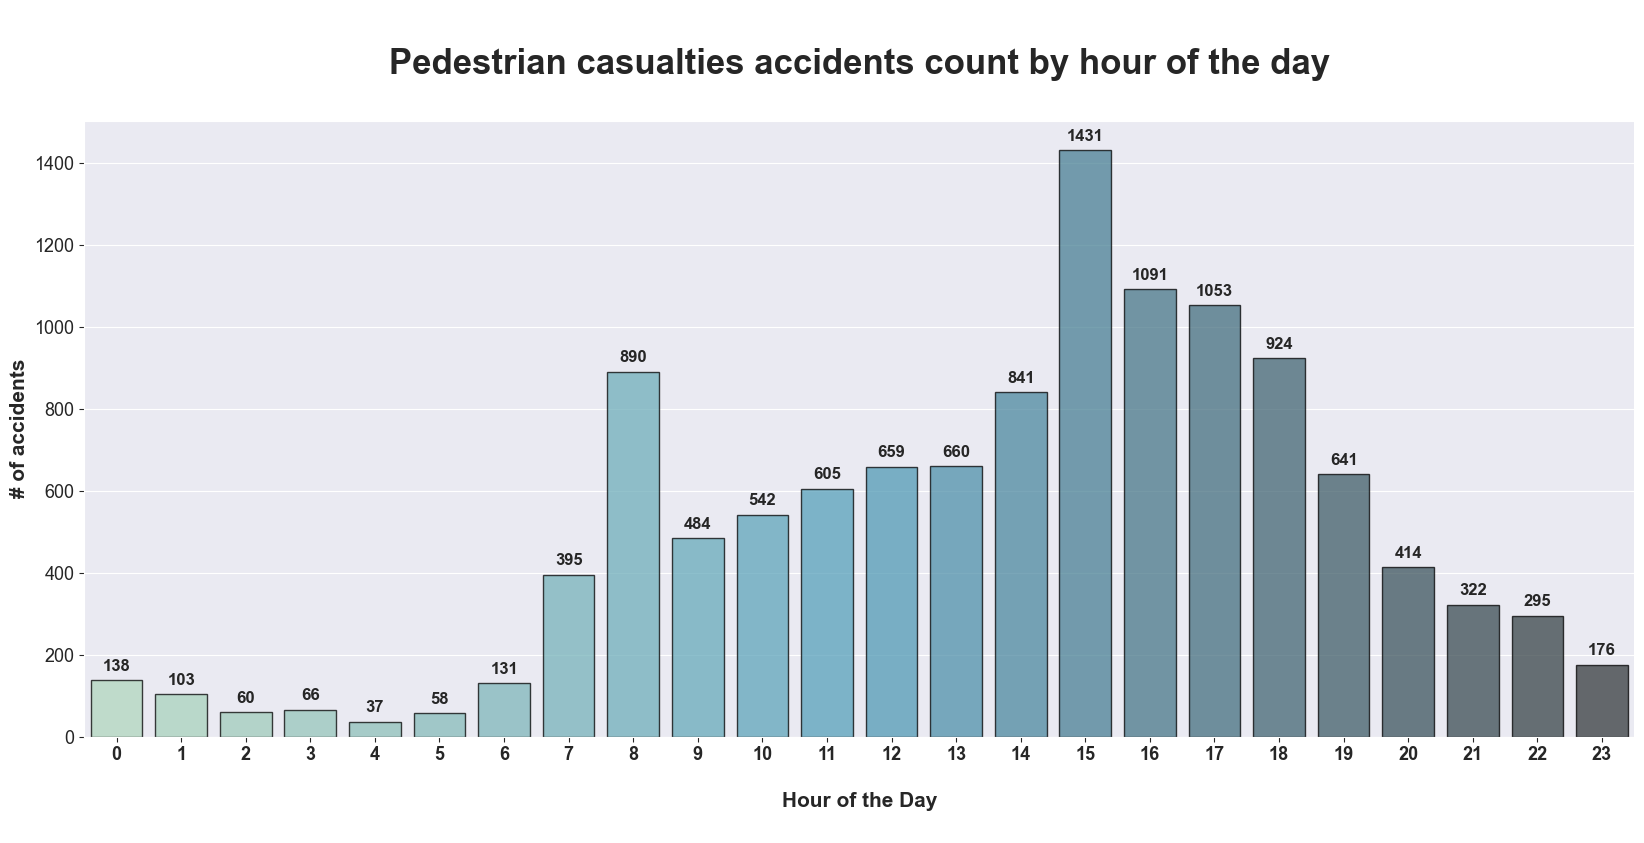

In [65]:
#calling the function to plot chart
plot_count_plot_no_hue(var = 'accidents_hour', df = pedestrians_2020,
                       x = pedestrians_2020.hour, order_code = hour_code,
                       labels_name = hour_code,
                       chart_title ='\nPedestrian casualties accidents count by hour of the day\n',
                       x_label_title ='\nHour of the Day\n', y_label_title ='# of accidents',
                       i = 20, j = 8, add_values=True)

__Pedestrian casualties visual: day of the week when accidents happen__

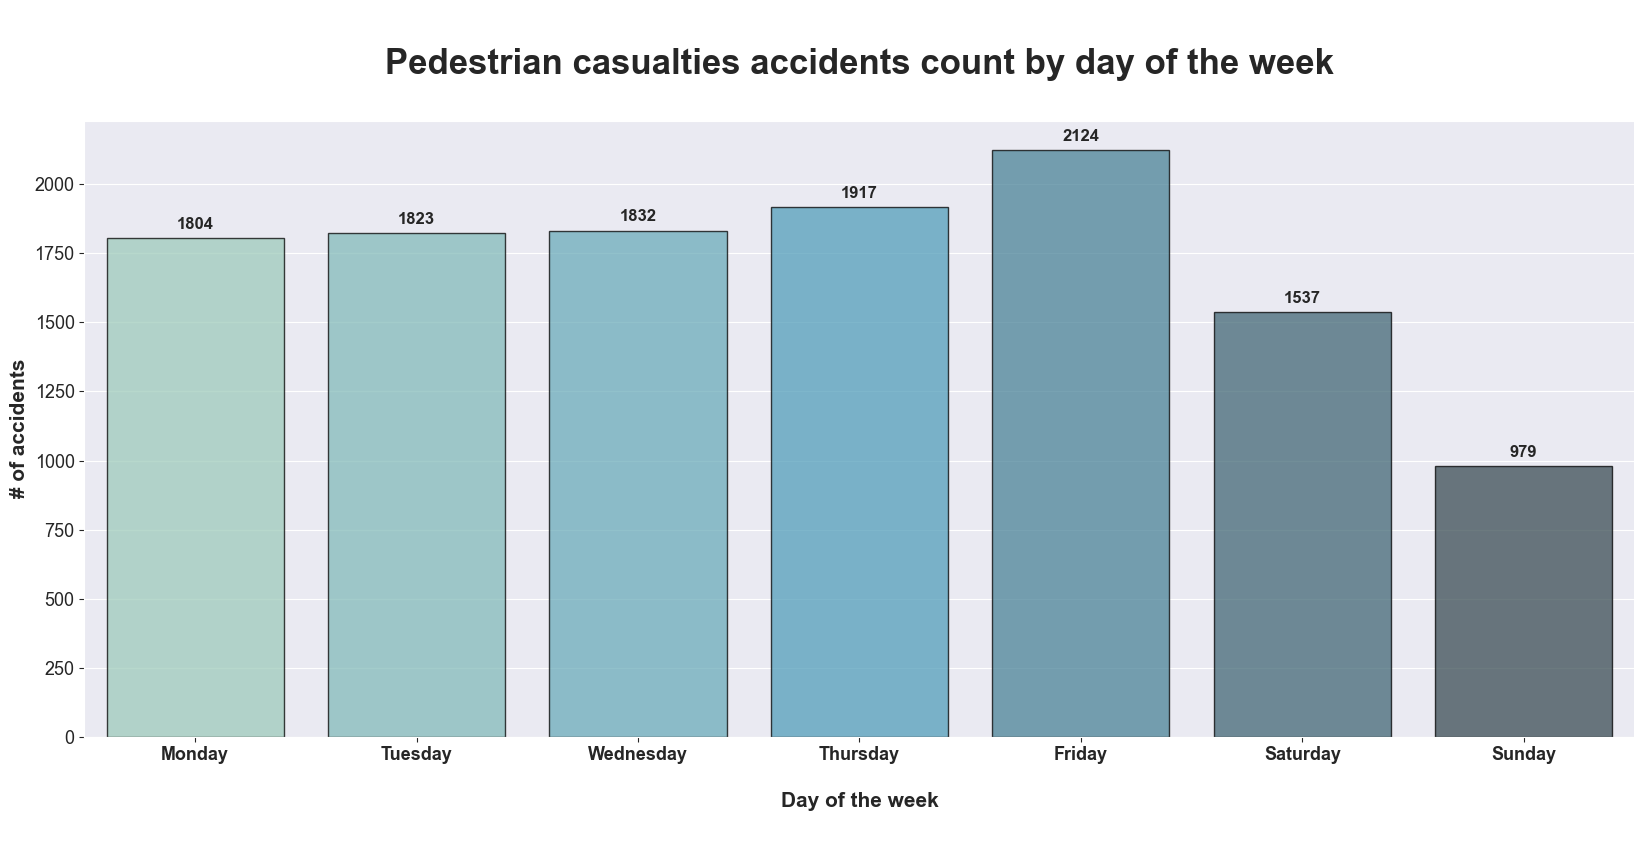

In [66]:
#calling the function to plot the chart
plot_count_plot_no_hue(var = 'accidents_day', df = pedestrians_2020,
                       x = pedestrians_2020.day_of_week, order_code = week_code,
                       labels_name = week_day,
                       chart_title ='\nPedestrian casualties accidents count by day of the week\n',
                       x_label_title ='\nDay of the week\n', y_label_title ='# of accidents',
                       i = 20, j = 8, add_values=True)

__Pedestrian casualties visual: accidents by month__

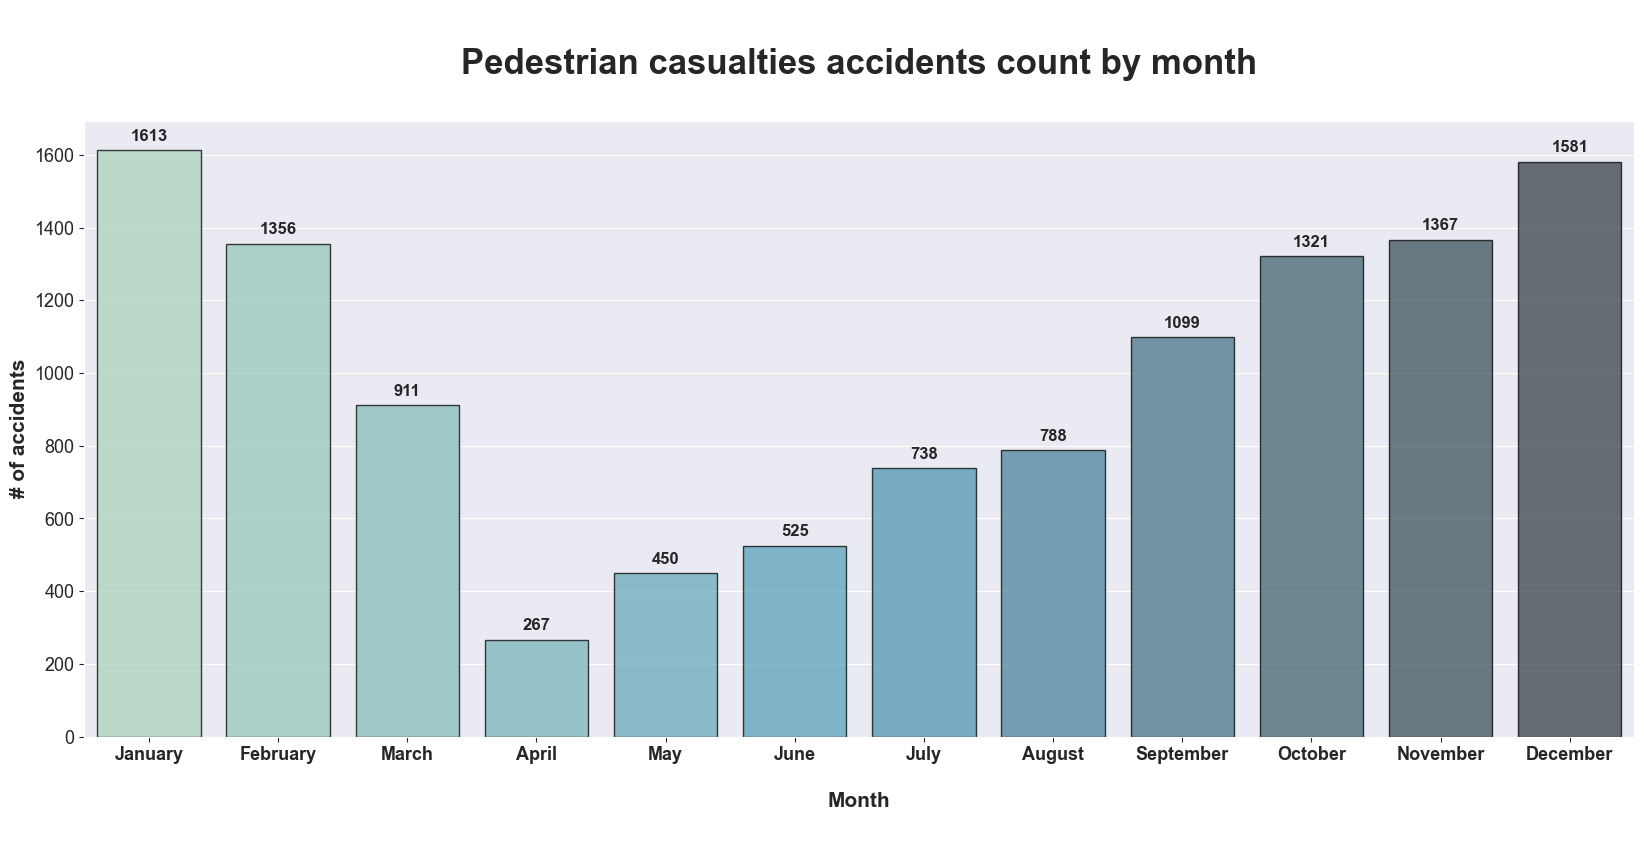

In [67]:
#calling the function to plot the chart
plot_count_plot_no_hue(var = 'accidents_day', df = pedestrians_2020,
                       x = pedestrians_2020.month, order_code = month_code,
                       labels_name = month_ticks,
                       chart_title ='\nPedestrian casualties accidents count by month\n',
                       x_label_title ='\nMonth\n', y_label_title ='# of accidents',
                       i = 20, j = 8, add_values=True)

### Where do accidents happen

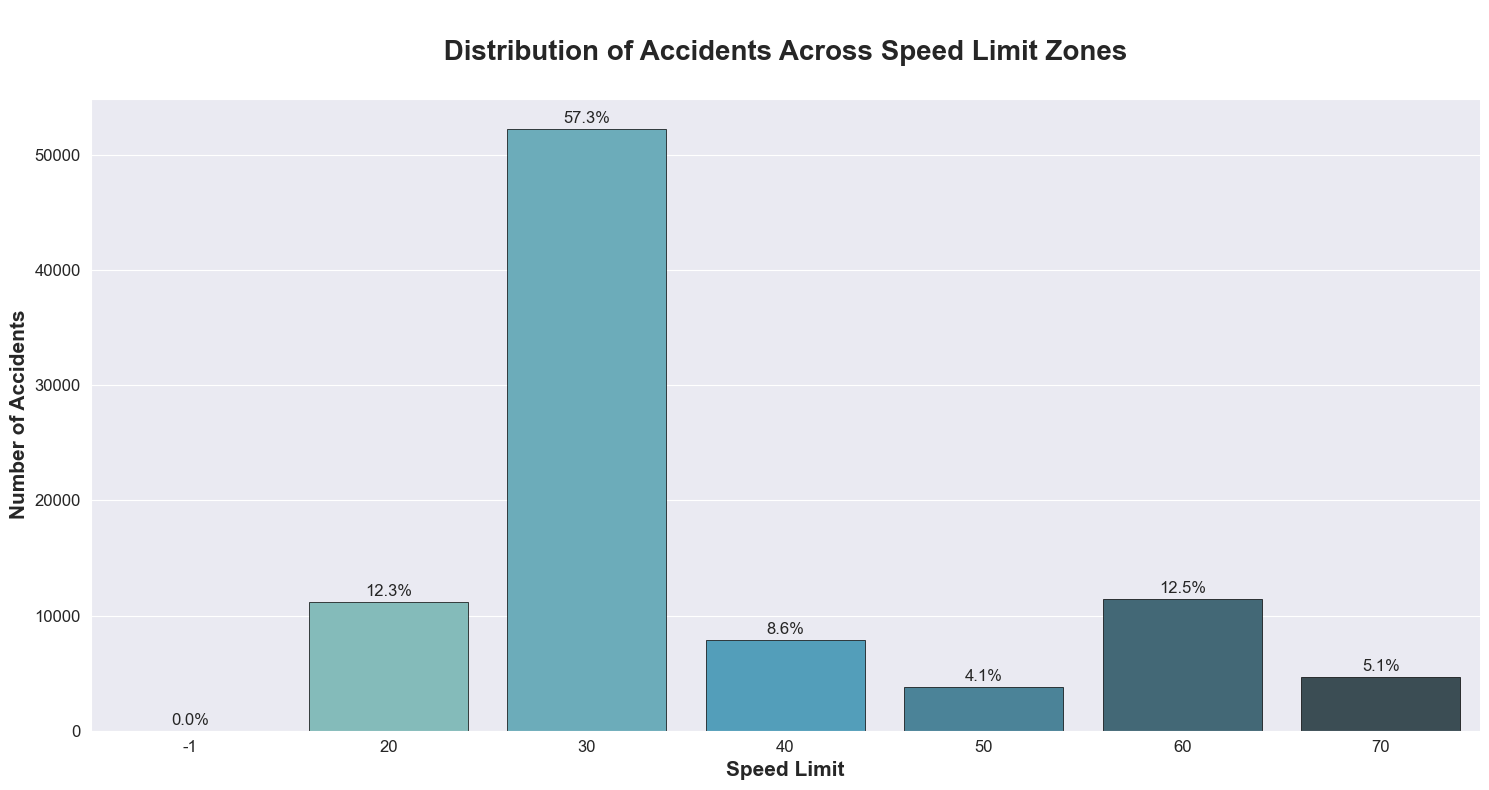

In [484]:
# Plotting speed limits for accidents
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

# Create the countplot
speed_limit_count = sns.countplot(x='speed_limit', data=accidents_2020, palette='GnBu_d', linewidth=0.5, edgecolor='black')

# Calculate total number of accidents
total_accidents = len(accidents_2020)

# Annotate the plot with percentage values
max_height = max([p.get_height() for p in speed_limit_count.patches])
for p in speed_limit_count.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_accidents)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + max_height * 0.01
    speed_limit_count.annotate(percentage, (x, y), ha='center', fontsize=12)
# Set plot title and labels
plt.title('\n Distribution of Accidents Across Speed Limit Zones \n',
          fontsize=20, fontweight='bold')
plt.xlabel('Speed Limit', fontsize=15, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,)

# Customize plot appearance
sns.despine(top=False, right=True, left=False, bottom=False)
plt.tight_layout()

# Show the plot
plt.show()

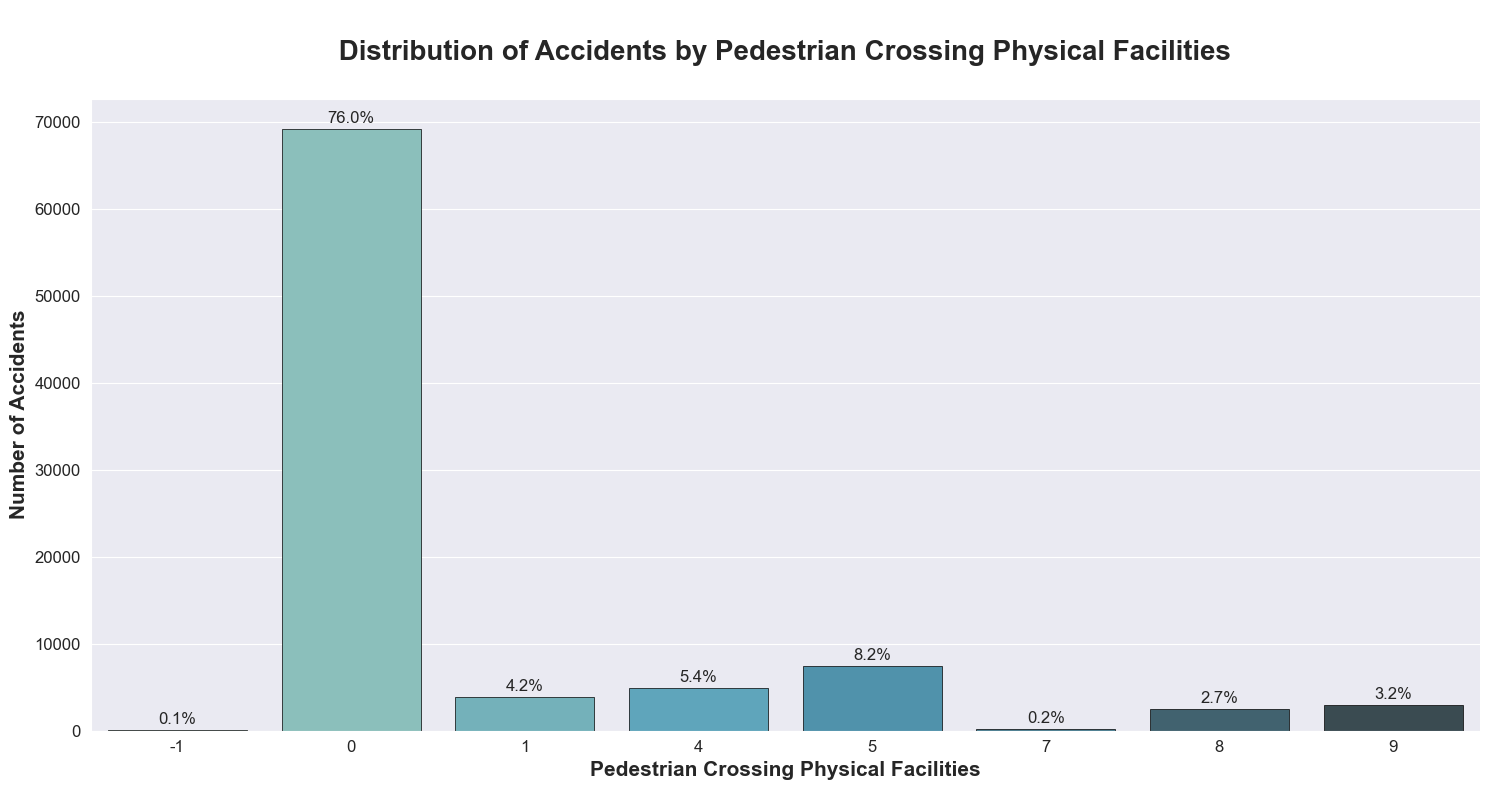

In [495]:
# Plotting speed limits for accidents
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

# Create the countplot
speed_limit_count = sns.countplot(x='pedestrian_crossing_physical_facilities',
                                  data = accidents_2020, palette ='GnBu_d', linewidth = 0.5, edgecolor ='black')

# Calculate total number of accidents
total_accidents = len(accidents_2020)

# Annotate the plot with percentage values
max_height = max([p.get_height() for p in speed_limit_count.patches])
for p in speed_limit_count.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_accidents)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + max_height * 0.01
    speed_limit_count.annotate(percentage, (x, y), ha='center', fontsize=12)
# Set plot title and labels
plt.title('\n Distribution of Accidents by Pedestrian Crossing Physical Facilities \n',
          fontsize=20, fontweight='bold')
plt.xlabel('Pedestrian Crossing Physical Facilities', fontsize=15, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,)

# Customize plot appearance
sns.despine(top=False, right=True, left=False, bottom=False)
plt.tight_layout()

# Show the plot
plt.show()

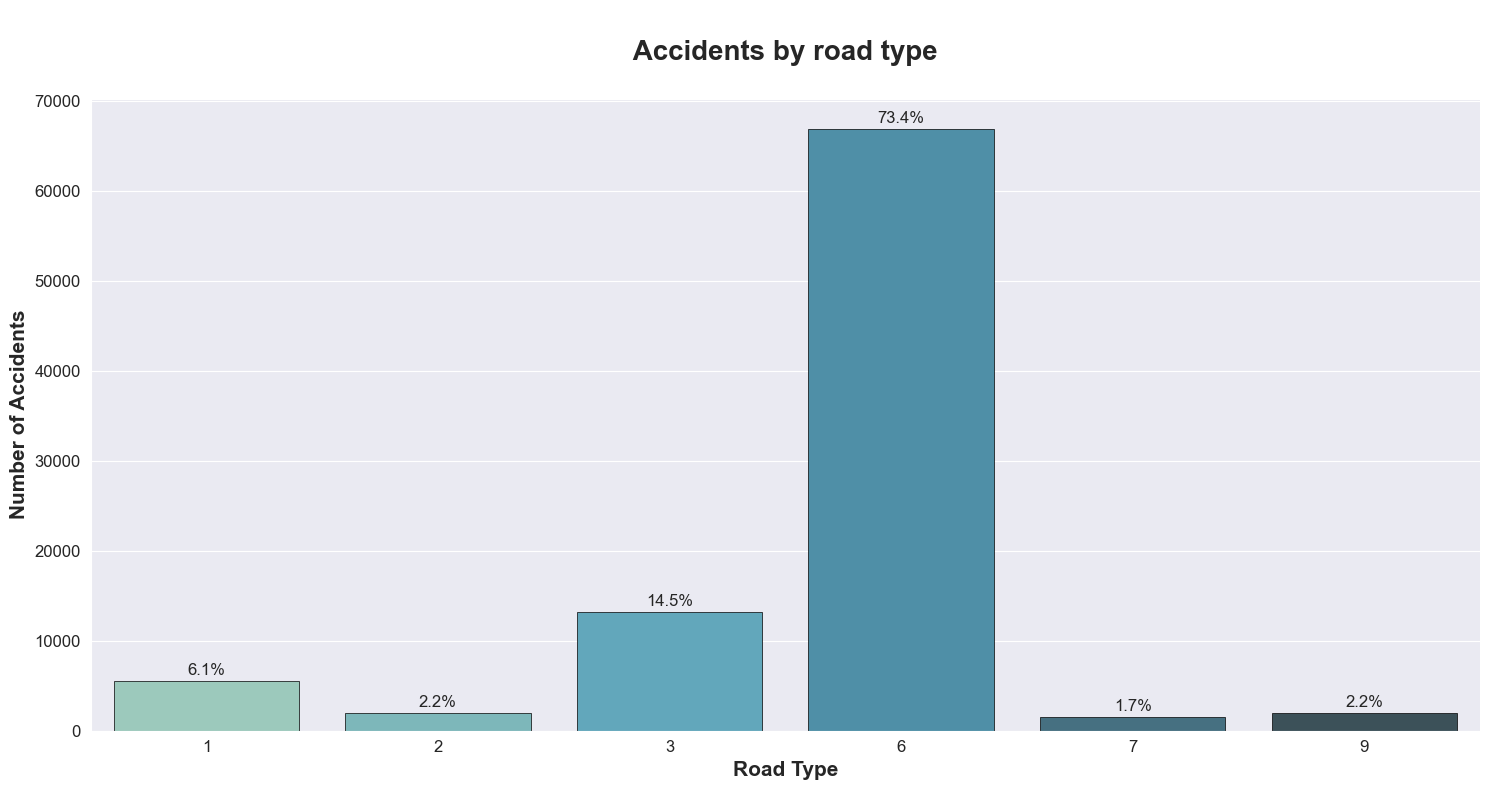

In [496]:
# Plotting road type for accidents
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

# Create the countplot
speed_limit_count = sns.countplot(x='road_type',
                                  data = accidents_2020, palette ='GnBu_d', linewidth = 0.5, edgecolor ='black')

# Calculate total number of accidents
total_accidents = len(accidents_2020)

# Annotate the plot with percentage values
max_height = max([p.get_height() for p in speed_limit_count.patches])
for p in speed_limit_count.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_accidents)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + max_height * 0.01
    speed_limit_count.annotate(percentage, (x, y), ha='center', fontsize=12)
# Set plot title and labels
plt.title('\n Accidents by road type \n',
          fontsize=20, fontweight='bold')
plt.xlabel('Road Type', fontsize=15, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,)

# Customize plot appearance
sns.despine(top=False, right=True, left=False, bottom=False)
plt.tight_layout()

# Show the plo

### Conditions in which accidents happen

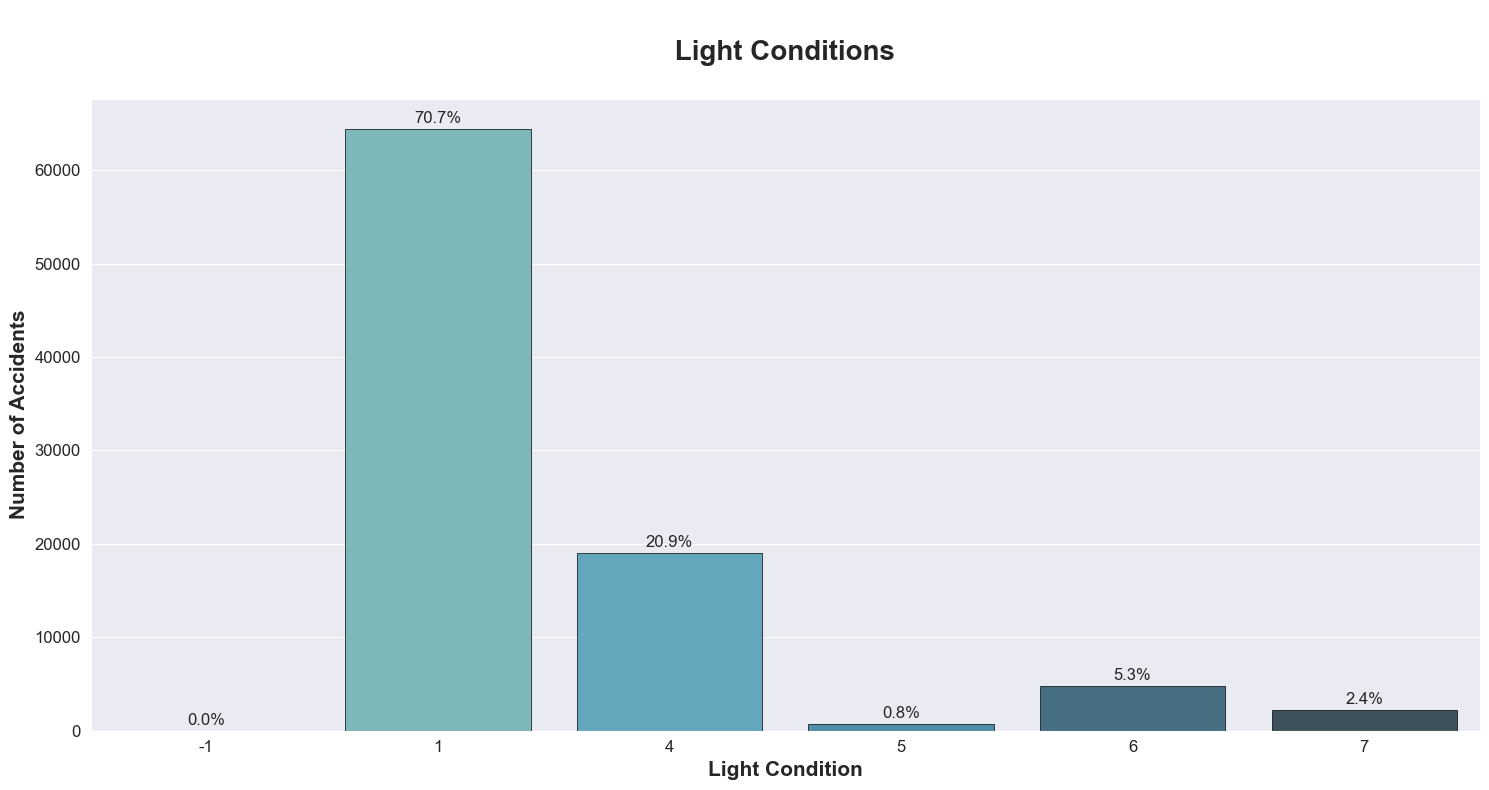

In [497]:
# Plotting speed light conditions
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

# Create the countplot
speed_limit_count = sns.countplot(x='light_conditions',
                                  data = accidents_2020, palette ='GnBu_d', linewidth = 0.5, edgecolor ='black')

# Calculate total number of accidents
total_accidents = len(accidents_2020)

# Annotate the plot with percentage values
max_height = max([p.get_height() for p in speed_limit_count.patches])
for p in speed_limit_count.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_accidents)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + max_height * 0.01
    speed_limit_count.annotate(percentage, (x, y), ha='center', fontsize=12)
# Set plot title and labels
plt.title('\n Light Conditions \n',
          fontsize=20, fontweight='bold')
plt.xlabel('Light Condition', fontsize=15, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,)

# Customize plot appearance
sns.despine(top=False, right=True, left=False, bottom=False)
plt.tight_layout()

# Show the plot
plt.show()

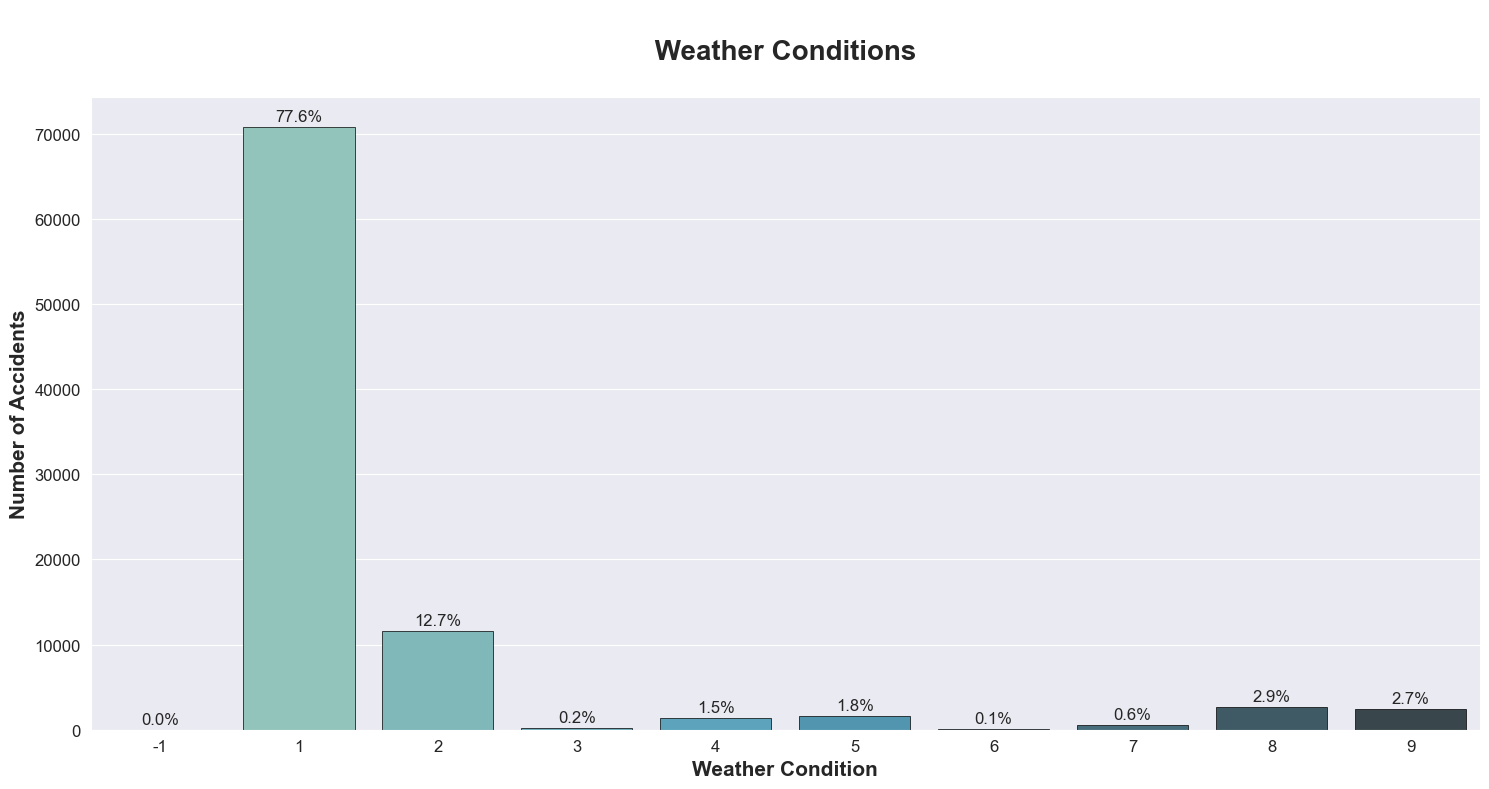

In [499]:
# Plotting speed light conditions
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

# Create the countplot
speed_limit_count = sns.countplot(x='weather_conditions',
                                  data = accidents_2020, palette ='GnBu_d', linewidth = 0.5, edgecolor ='black')

# Calculate total number of accidents
total_accidents = len(accidents_2020)

# Annotate the plot with percentage values
max_height = max([p.get_height() for p in speed_limit_count.patches])
for p in speed_limit_count.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_accidents)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + max_height * 0.01
    speed_limit_count.annotate(percentage, (x, y), ha='center', fontsize=12)
# Set plot title and labels
plt.title('\n Weather Conditions \n',
          fontsize=20, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=15, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,)

# Customize plot appearance
sns.despine(top=False, right=True, left=False, bottom=False)
plt.tight_layout()

# Show the plot
plt.show()

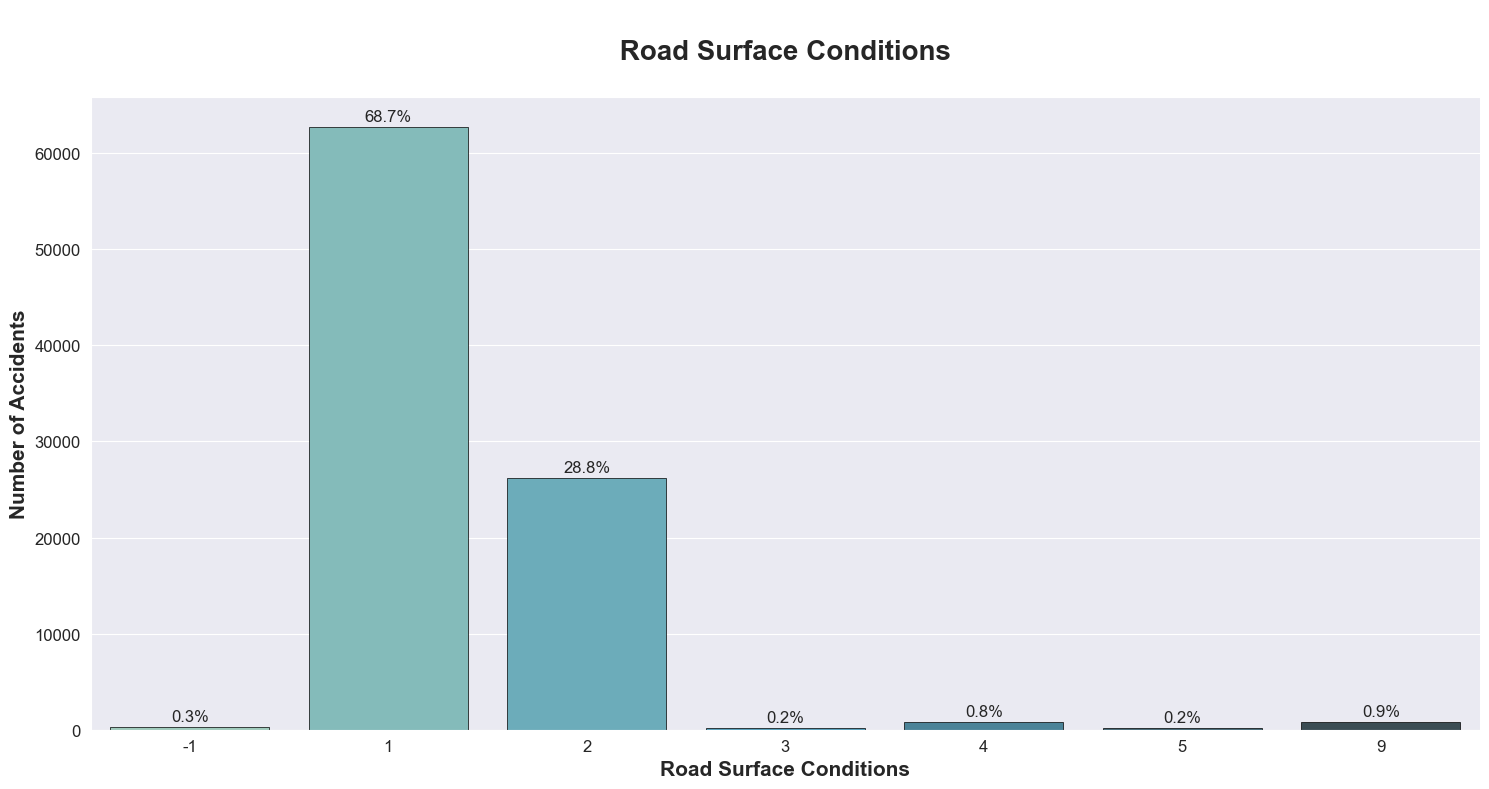

In [501]:
# Plotting speed light conditions
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

# Create the countplot
speed_limit_count = sns.countplot(x='road_surface_conditions',
                                  data = accidents_2020, palette ='GnBu_d', linewidth = 0.5, edgecolor ='black')

# Calculate total number of accidents
total_accidents = len(accidents_2020)

# Annotate the plot with percentage values
max_height = max([p.get_height() for p in speed_limit_count.patches])
for p in speed_limit_count.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_accidents)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + max_height * 0.01
    speed_limit_count.annotate(percentage, (x, y), ha='center', fontsize=12)
# Set plot title and labels
plt.title('\n Road Surface Conditions \n',
          fontsize=20, fontweight='bold')
plt.xlabel('Road Surface Conditions', fontsize=15, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12,)

# Customize plot appearance
sns.despine(top=False, right=True, left=False, bottom=False)
plt.tight_layout()

# Show the plot
plt.show()

## 4. Using the apriori algorithm, explore the impact of selected variables on accident severity.

In [464]:
#association rules algorithm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [465]:
#selecting preferred variables
preferred_columns = ['speed_limit', 'junction_detail', 'junction_control', 'light_conditions',
                       'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site',
                       'accident_severity']

apriori_df = accidents_2020[preferred_columns]

#encoding the dataframe
apriori_df = pd.get_dummies(apriori_df, columns=preferred_columns)
apriori_df.head()

speed_limit_-1  speed_limit_20  speed_limit_30  speed_limit_40  \
0           False            True           False           False   
1           False            True           False           False   
2           False           False            True           False   
3           False           False            True           False   
4           False           False            True           False   

   speed_limit_50  speed_limit_60  speed_limit_70  junction_detail_-1  \
0           False           False           False               False   
1           False           False           False               False   
2           False           False           False               False   
3           False           False           False               False   
4           False           False           False               False   

   junction_detail_0  junction_detail_1  junction_detail_2  junction_detail_3  \
0               True              False              False              False   
1              False              False              False              False   
2              False              False              False               True   
3               True              False              False              False   
4              False              False              False               True   

   junction_detail_5  junction_detail_6  junction_detail_7  junction_detail_8  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   junction_detail_9  junction_detail_99  junction_control_-1  \
0              False               False                 True   
1               True               False                False   
2              False               False                False   
3              False               False                 True   
4              False               False                False   

   junction_control_1  junction_control_2  junction_control_3  \
0               False               False               False   
1               False                True               False   
2                True               False               False   
3               False               False               False   
4               False               False               False   

   junction_control_4  junction_control_9  light_conditions_-1  \
0               False               False                False   
1               False               False                False   
2               False               False                False   
3               False               False                False   
4                True               False                False   

   light_conditions_1  light_conditions_4  light_conditions_5  \
0                True               False               False   
1                True               False               False   
2               False                True               False   
3               False                True               False   
4               False                True               False   

   light_conditions_6  light_conditions_7  weather_conditions_-1  \
0               False               False                  False   
1               False               False                  False   
2               False               False                  False   
3               False               False                  False   
4               False               False                  False   

   weather_conditions_1  weather_conditions_2  weather_conditions_3  \
0                 False                 False                 False   
1                  True                 False         

In [467]:
#apriori rules
frequent_itemsets = apriori(apriori_df, min_support = 0.4, use_colnames=True)
apriori_rules_df = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.0)
consequents_apriori = ['accident_severity_1', 'accident_severity_2', 'accident_severity_3']
apriori_rules_selected = apriori_rules_df[
    (apriori_rules_df['consequents'].apply(lambda c: len(c) == 1)) &
    (apriori_rules_df['consequents'].apply(lambda c: c.issubset(consequents_apriori)))
]
apriori_rules_df_sorted = apriori_rules_selected.sort_values(by=['support'], ascending=[False])
apriori_rules_df_sorted

antecedents            consequents  \
22                                (light_conditions_1)  (accident_severity_3)   
72   (special_conditions_at_site_0, light_condition...  (accident_severity_3)   
8                                     (speed_limit_30)  (accident_severity_3)   
54          (weather_conditions_1, light_conditions_1)  (accident_severity_3)   
36      (special_conditions_at_site_0, speed_limit_30)  (accident_severity_3)   
108  (weather_conditions_1, special_conditions_at_s...  (accident_severity_3)   
66     (light_conditions_1, road_surface_conditions_1)  (accident_severity_3)   
122  (special_conditions_at_site_0, light_condition...  (accident_severity_3)   

     antecedent support  consequent support   support  confidence      lift  \
22             0.706781            0.783497  0.559349    0.791404  1.010092   
72             0.677817            0.783497  0.535462    0.789981  1.008277   
8              0.573113            0.783497  0.460052    0.802725  1.024542   
54             0.578684            0.783497  0.453845    0.784270  1.000987   
36             0.552374            0.783497  0.442362    0.800838  1.022133   
108            0.559184            0.783497  0.438216    0.783670  1.000222   
66             0.534607            0.783497  0.420855    0.787224  1.004757   
122            0.517520            0.783497  0.406971    0.786386  1.003688   

     leverage  conviction  zhangs_metric  
22   0.005588    1.037906       0.034074  
72   0.004395    1.030877       0.025478  
8    0.011020    1.097470       0.056113  
54   0.000448    1.003585       0.002340  
36   0.009579    1.087071       0.048375  
108  0.000097    1.000803       0.000503  
66   0.001992    1.017516       0.010173  
122  0.001496    1.013528       0.007616

##  5.Filter accidents in Kingston upon Hull, Humberside, and the East Riding of Yorkshire using criteria like LSOA or police region. Apply clustering to analyze the accident distribution. Discover insights on spatial patterns, accident hotspots, and potential risk factors in the region.

In [68]:
#Kingston-upon-Hull code is 228 for the Local Authority District
#East Riding of Yorkshire is 231 for the Local Authority District
#North Lincolnshire is 232 for the Local Authority District
#North East Lincolnshire is 233 for the Local Authority District
#https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/995424/stats20-2005.pdf

#E06000010 = Kingston upon Hull, City of 
#E06000011 = East Riding of Yorkshire 
#E06000013  = North Lincolnshire
#E06000012 = North East Lincolnshire
#https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/995423/stats20-2011.pdf

#creating a new dataframe with the local_authority district codes for east riding and kingston upon hull
east_riding_hull = acccidents_casualties_vehicles[
    acccidents_casualties_vehicles['local_authority_district'].isin([231, 232, 233])]
    
east_riding_hull.head()

accident_index  accident_year_x accident_reference_x  \
48975  2020160915008             2020            160915008   
48977  2020160915041             2020            160915041   
48979  2020160915311             2020            160915311   
48980  2020160915311             2020            160915311   
48984  2020160915489             2020            160915489   

       location_easting_osgr  location_northing_osgr  longitude   latitude  \
48975               497660.0                402806.0  -0.528743  53.512895   
48977               526236.0                410340.0  -0.095008  53.574501   
48979               527410.0                408065.0  -0.078215  53.553782   
48980               527410.0                408065.0  -0.078215  53.553782   
48984               477357.0                413169.0  -0.832277  53.609396   

       police_force  accident_severity  number_of_vehicles  \
48975            16                  3                   1   
48977            16                  3                   1   
48979            16                  2                   2   
48980            16                  2                   2   
48984            16                  3                   1   

       number_of_casualties       date  day_of_week   time  \
48975                     1 2020-01-02            5  16:17   
48977                     1 2020-01-02            5  22:50   
48979                     1 2020-01-03            6  14:05   
48980                     1 2020-01-03            6  14:05   
48984                     1 2020-01-05            1  00:04   

       local_authority_district local_authority_ons_district  \
48975                       232                    E06000013   
48977                       233                    E06000012   
48979                       233                    E06000012   
48980                       233                    E06000012   
48984                       232                    E06000013   

      local_authority_highway  first_road_class  first_road_number  road_type  \
48975               E06000013                 4               1206          6   
48977               E06000012                 3                180          3   
48979               E06000012                 3                 46          6   
48980               E06000012                 3                 46          6   
48984               E06000013                 3                161          6   

       speed_limit  junction_detail  junction_control  second_road_class  \
48975           30                5                 4                  4   
48977           50                0                -1                  0   
48979           30                6                 4                  6   
48980           30                6                 4                  6   
48984           30                2                 4                  6   

       second_road_number  pedestrian_crossing_human_control  \
48975                1207                                  0   
48977                  -1                                  0   
48979                   0                                  0   
48980                   0                                  0   
48984                   0                                  0   

       pedestrian_crossing_physical_facilities  light_conditions  \
48975                                        0                 4   
48977                                        0                 4   
48979                                        4                 1   
48980                                        4                 1   
48984                                        0                 4   

       weather_conditions  road_surface_conditions  \
48975                   1                        1   
48977                   1                        1   
48979                   1                        1   
48980                   1                        1   
48984                   1

In [69]:
#checking the length of the dataframe
print ('The length of the east_riding_hull dataframe is:', len(east_riding_hull))

The length of the east_riding_hull dataframe is: 2729


__Clustering based on Longitude and Latitude__

In [70]:
#importing the KMeans library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [71]:
"""
Dropping selected columns before carrying out the Kmeans analysis
"""

df_kmean = east_riding_hull[['location_easting_osgr', 'location_northing_osgr', 'longitude',
                             'latitude', 'accident_severity', 
                             'road_type', 'speed_limit', 'junction_detail',
                             'junction_control','pedestrian_crossing_human_control',
                             'pedestrian_crossing_physical_facilities', 'light_conditions',
                             'weather_conditions', 'road_surface_conditions',
                             'special_conditions_at_site', 'carriageway_hazards']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_kmean)
df_scaled = pd.DataFrame(df_scaled, columns = df_kmean.columns)

In [72]:
"""
Elbow method
"""
#Inertia
inertia_values = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

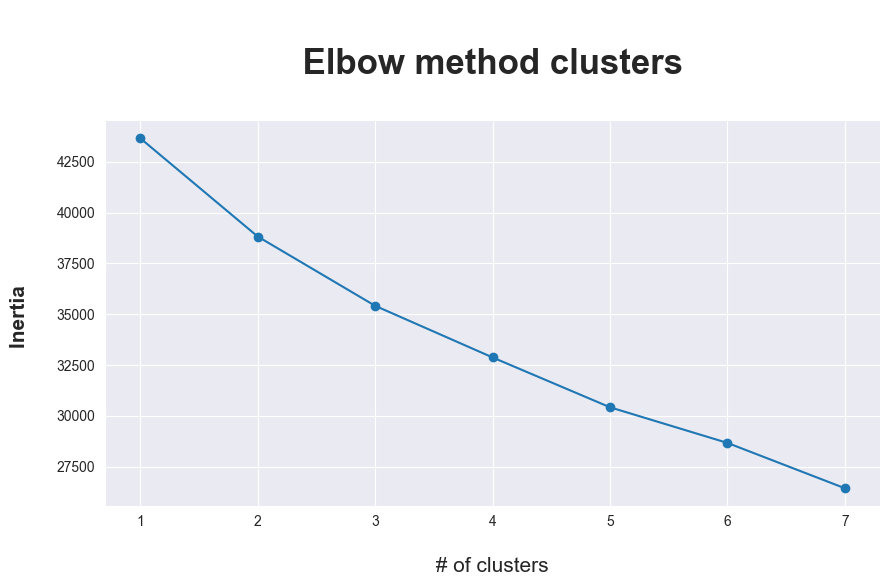

In [73]:
#Plot elbow
plt.figure(figsize=(10, 5))
plt.plot(range(1, 8), inertia_values, marker='o')
plt.xlabel('\n # of clusters ', fontsize = 15)
plt.ylabel('Inertia \n', fontsize = 15, fontweight = 'bold')
plt.title('\n Elbow method clusters \n', fontsize = 25, fontweight = 'bold')
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [74]:
#fitting kmeans
kmeans = KMeans(n_clusters = 3, random_state=0)
cluster_group = kmeans.fit(df_scaled)
east_riding_hull['clusters'] = kmeans.labels_
east_riding_hull.head(2)

accident_index  accident_year_x accident_reference_x  \
48975  2020160915008             2020            160915008   
48977  2020160915041             2020            160915041   

       location_easting_osgr  location_northing_osgr  longitude   latitude  \
48975               497660.0                402806.0  -0.528743  53.512895   
48977               526236.0                410340.0  -0.095008  53.574501   

       police_force  accident_severity  number_of_vehicles  \
48975            16                  3                   1   
48977            16                  3                   1   

       number_of_casualties       date  day_of_week   time  \
48975                     1 2020-01-02            5  16:17   
48977                     1 2020-01-02            5  22:50   

       local_authority_district local_authority_ons_district  \
48975                       232                    E06000013   
48977                       233                    E06000012   

      local_authority_highway  first_road_class  first_road_number  road_type  \
48975               E06000013                 4               1206          6   
48977               E06000012                 3                180          3   

       speed_limit  junction_detail  junction_control  second_road_class  \
48975           30                5                 4                  4   
48977           50                0                -1                  0   

       second_road_number  pedestrian_crossing_human_control  \
48975                1207                                  0   
48977                  -1                                  0   

       pedestrian_crossing_physical_facilities  light_conditions  \
48975                                        0                 4   
48977                                        0                 4   

       weather_conditions  road_surface_conditions  \
48975                   1                        1   
48977                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
48975                           0                    0                    2   
48977                           0                    0                    1   

       did_police_officer_attend_scene_of_accident  trunk_road_flag  \
48975                                            1                2   
48977                                            1                2   

      lsoa_of_accident_location  day  month  year  week_no  \
48975                 E01013325    2      1  2020        1   
48977                 E01013220    2      1  2020        1   

                 datetime  hour  casualty_index  accident_year_y  \
48975 2020-01-02 16:17:00    16          530928             2020   
48977 2020-01-02 22:50:00    22          530930             2020   

      accident_reference_y  vehicle_reference_x  casualty_reference  \
48975            160915008                    1                   1   
48977            160915041                    1                   1   

       casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty  \
48975               1                1               30                     6   
48977               1                2               41                     7   

       casualty_severity  pedestrian_location  pedestrian_movement  \
48975                  3                    0                    0   
48977                  3                    0                    0   

       car_passenger  bus_or_coach_passenger  \
48975              0                       0   
48977              0                       0   

       pedestrian_road_maintenance_worker  casualty_type  \
48975                                   0              9   
48977                                   0              9   

       casualty_home_area_type  casualty_imd_decile  vehicle_index  \
48975                        1                    3         751056   
4897

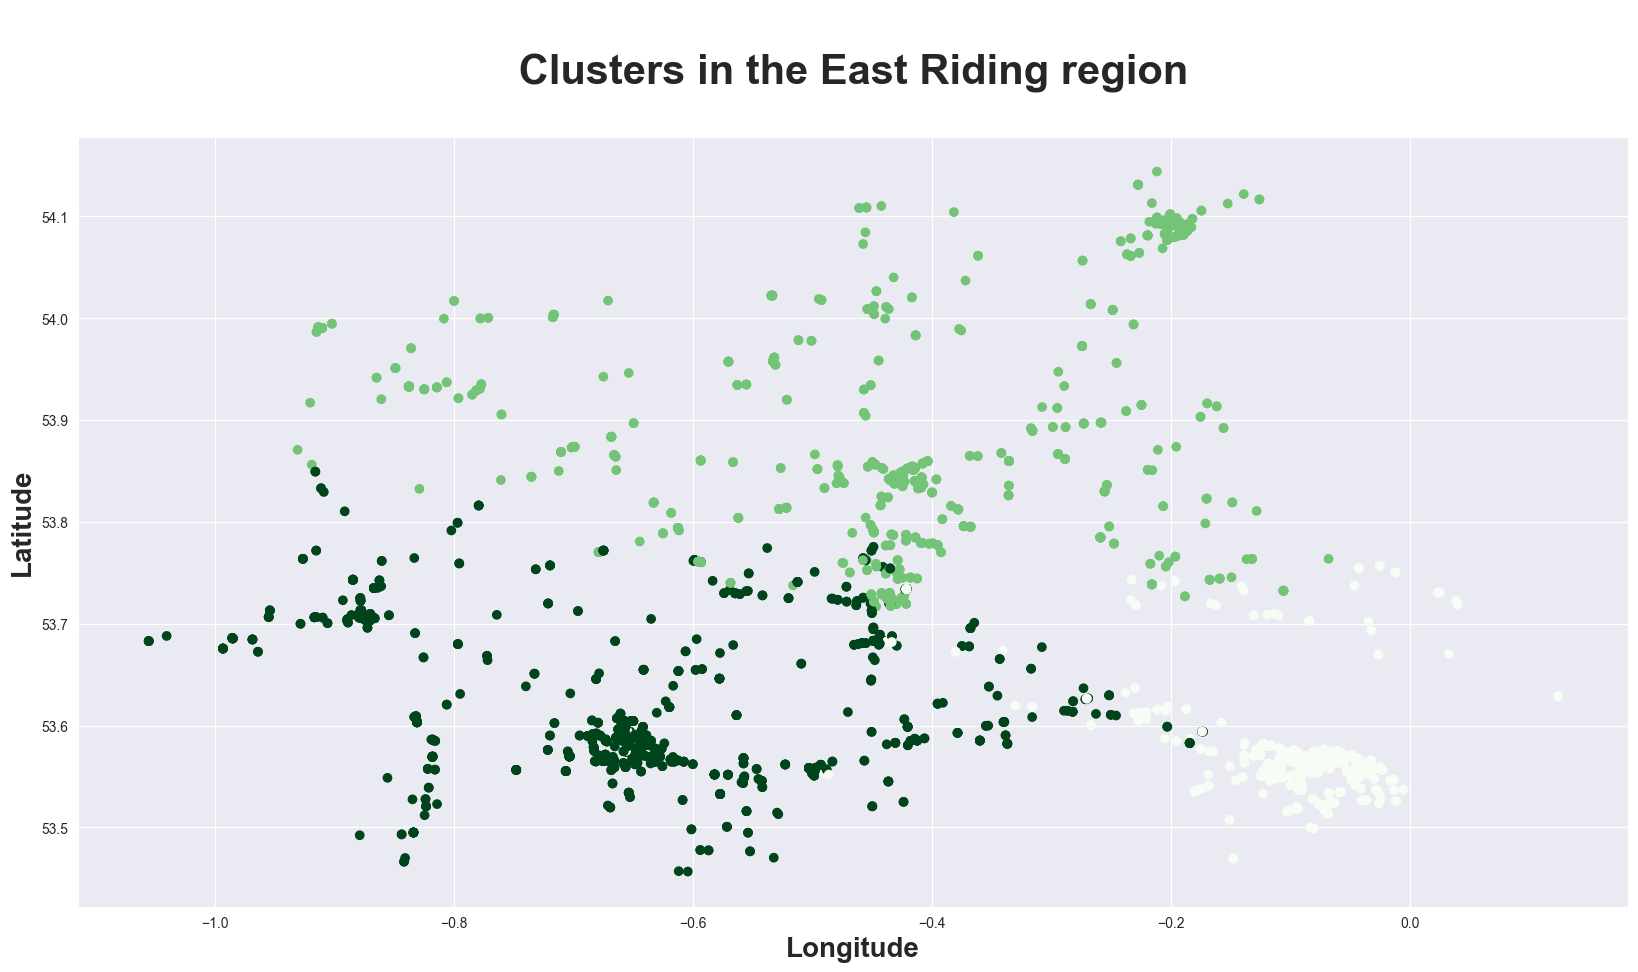

In [75]:
plt.figure(figsize=(20, 10))
plt.scatter(east_riding_hull['longitude'], east_riding_hull['latitude'], c = east_riding_hull['clusters'], cmap='Greens')
plt.xlabel('Longitude', fontsize = 20, fontweight = 'bold')
plt.ylabel('Latitude', fontsize = 20, fontweight = 'bold')
plt.title('\n Clusters in the East Riding region \n', fontsize = 30, fontweight = 'bold')
plt.show()

In [76]:
#using folium to plot maps
import folium

In [77]:
#Using folium to plot clusters of accident in East riding
east_rd = folium.Map(location=[east_riding_hull['latitude'].mean(), east_riding_hull['longitude'].mean()], zoom_start=10)

#map based on cluster labels
for cluster_label in range(4):
    cluster_data = east_riding_hull[east_riding_hull['clusters'] == cluster_label]
    for idx, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color='blue' if cluster_label == 0 else 'green' if cluster_label == 1 else 'red' if cluster_label == 2 else 'purple',
            fill=True,
            fill_color='blue' if cluster_label == 0 else 'green' if cluster_label == 1 else 'red' if cluster_label == 2 else 'purple'
        ).add_to(east_rd)

east_rd

## 7. Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

__The first step here is to visualise the targets in the dataset__

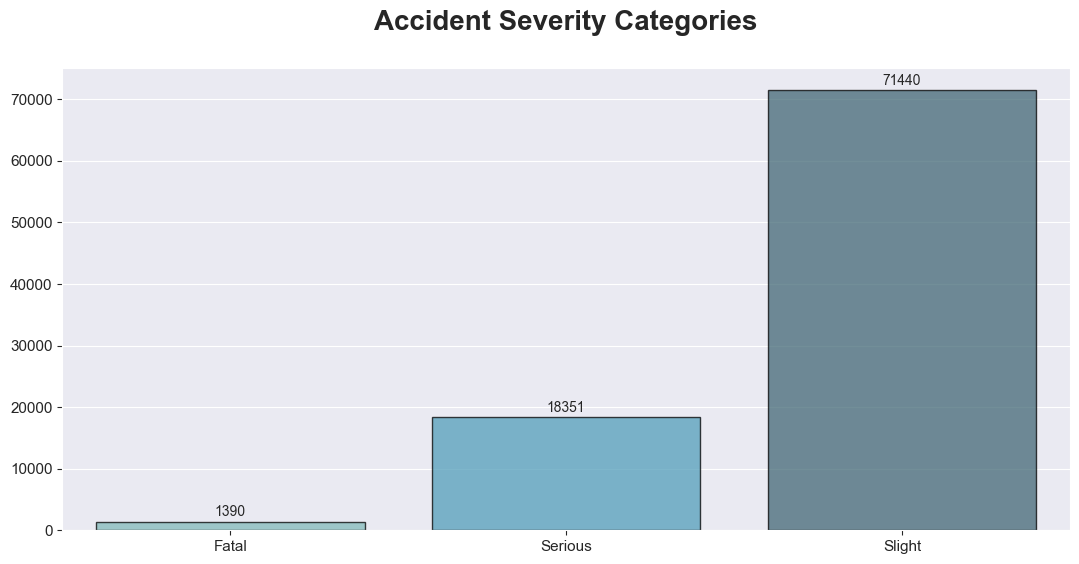

In [78]:
#code for the different accident severity
#group to count unique accident index
severity_group = accidents_2020.groupby(['accident_index', 'accident_severity']).size().reset_index(name='count')
severity_code = [1, 2, 3]
severity_types = ['Fatal', 'Serious', 'Slight']

plt.figure(figsize=(13, 6))
severity_count_plot = sns.countplot(x='accident_severity',
                                    data=severity_group,
                                    edgecolor='black',
                                    palette='GnBu_d',
                                    order=severity_code,
                                    alpha=0.75,
                                    linewidth=1)


# Adding labels to the bars
for bars in severity_count_plot.containers:
    severity_count_plot.bar_label(bars, padding=2, fontsize=10)

plt.title('Accident Severity Categories\n', fontsize=20, fontweight='bold')
plt.tick_params(bottom=True, left=True)
plt.xticks(ticks=range(len(severity_code)), labels=severity_types, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel(xlabel = '', fontsize=15, fontweight='bold')
plt.ylabel(ylabel = '', fontsize=15, fontweight='bold')

plt.show()

__We can see that the data is imbalanced with fatal accidents accounting or less than 2% of the total accidents__

__The target column imbalance will be addressed in the development of predictive models. The severity types will be grouped into "Fatal" and "Non-Fatal" for the scope of determining whether an accident is fatal or not.".__

In [79]:
#function to map accident_severity to non_fatal or fatal
def map_severity(severity):
    if severity in [2, 3]:
        return 'non_fatal'
    elif severity == 1:
        return 'fatal'
    else:
        return 'unknown'  # Handle any other possible values

# using the new function
accidents_2020['severity_type'] = accidents_2020['accident_severity'].apply(map_severity)
accidents_2020.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020           10219808               521389.0   
1  2020010220496           2020           10220496               529337.0   
2  2020010228005           2020           10228005               526432.0   
3  2020010228006           2020           10228006               538676.0   
4  2020010228011           2020           10228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  number_of_casualties       date  \
0                  3                   1                     1 2020-02-04   
1                  3                   1                     2 2020-04-27   
2                  3                   1                     1 2020-01-01   
3                  2                   1                     1 2020-01-01   
4                  3                   1                     2 2020-01-01   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            3  09:00                        10                    E09000032   
1            2  13:55                         9                    E09000022   
2            4  01:25                         1                    E09000033   
3            4  01:50                        17                    E09000025   
4            4  02:25                         1                    E09000033   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000032                 6                  0          6   
1               E09000022                 3               3036          6   
2               E09000033                 5                  0          6   
3               E09000025                 3                 11          6   
4               E09000033                 3                 40          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  0   
1           20                9                 2                  6   
2           30                3                 1                  6   
3           30                0                -1                  0   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  9   
1                   0                                  0   
2                   0                                  0   
3                  -1                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                    1   

__Plotting the count again__

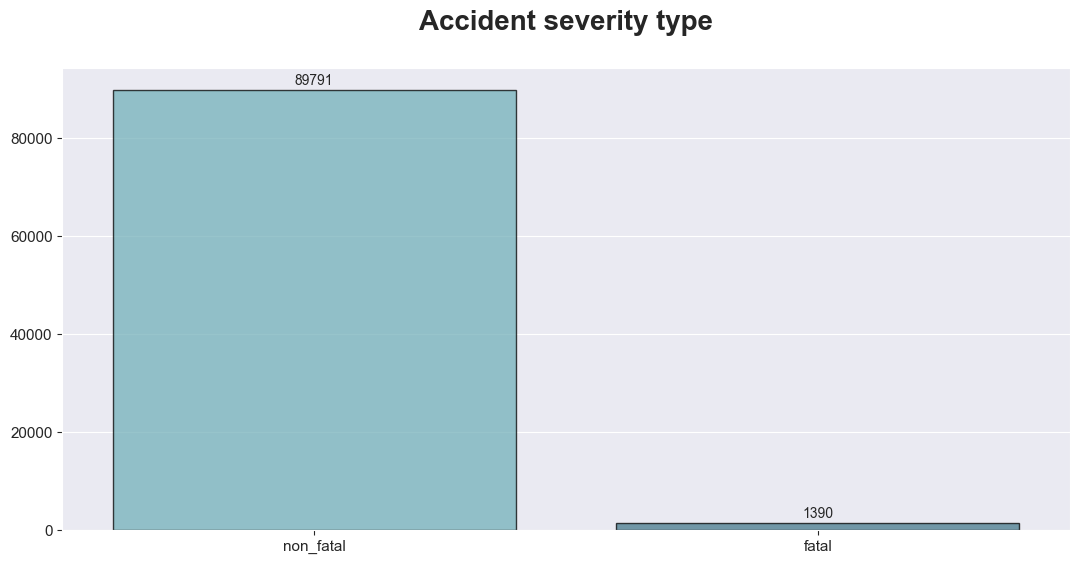

In [260]:
#code for the different accident severity
plt.figure(figsize=(13, 6))
severity_counts = accidents_2020.groupby(['accident_index', 'severity_type']).size().reset_index(name='count')
severity_count_plot = sns.countplot(x='severity_type',
                                    data=severity_counts,
                                    edgecolor='black',
                                    palette='GnBu_d',
                                    alpha=0.75,
                                    linewidth=1)


# Adding labels to the bars
for bars in severity_count_plot.containers:
    severity_count_plot.bar_label(bars, padding=2, fontsize=10)

plt.title('Accident severity type\n', fontsize=20, fontweight='bold')
plt.tick_params(bottom=True, left=True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel(xlabel = '', fontsize=15, fontweight='bold')
plt.ylabel(ylabel = '', fontsize=15, fontweight='bold')

plt.show()

__I will perform an analysis using only known variables, excluding data that is missing or out of range. Additionally, columns with values for unknowns will be removed from the dataset.__

<u>__Selecting relevant columns for modelling</u>:__ My plan is to focus on using selected features for modelling and will not perform any feature selection at this stage

In [261]:
accidents_2020.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'day', 'month', 'year',
       'week_no', 'datetime', 'hour', 'severity_type'],
      dtype='obje

In [262]:
"""
I will keep accident_index for now and select relevant columns for modelling
"""
accidents_columns_modelling = ['accident_index', 'location_easting_osgr', 'location_northing_osgr',
                               'latitude', 'longitude',
                               'number_of_casualties', 'day_of_week', 'local_authority_district',
                               'first_road_class', 'road_type', 'speed_limit', 'junction_detail',
                               'junction_control', 'second_road_class', 'second_road_number', 
                               'pedestrian_crossing_human_control',
                               'pedestrian_crossing_physical_facilities', 'light_conditions',
                               'weather_conditions', 'road_surface_conditions',
                               'special_conditions_at_site', 'carriageway_hazards',
                               'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
                               'trunk_road_flag', 'month', 'hour', 'severity_type']

vehicles_columns_modelling = ['accident_index', 'vehicle_type', 'towing_and_articulation',
                              'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
                              'vehicle_location_restricted_lane', 'junction_location',
                              'skidding_and_overturning', 'hit_object_in_carriageway',
                              'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
                              'first_point_of_impact', 'vehicle_left_hand_drive',
                              'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
                              'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
                              'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
                              'driver_home_area_type']

#relevant columns from each DataFrame
accidents_selected = accidents_2020[accidents_columns_modelling]
vehicles_selected = vehicles_2020[vehicles_columns_modelling]
modelling_data = accidents_selected.merge(vehicles_selected, on='accident_index')
modelling_data.head()

accident_index  location_easting_osgr  location_northing_osgr   latitude  \
0  2020010219808               521389.0                175144.0  51.462262   
1  2020010220496               529337.0                176237.0  51.470327   
2  2020010228005               526432.0                182761.0  51.529614   
3  2020010228006               538676.0                184371.0  51.541210   
4  2020010228011               529324.0                181286.0  51.515704   

   longitude  number_of_casualties  day_of_week  local_authority_district  \
0  -0.254001                     1            3                        10   
1  -0.139253                     2            2                         9   
2  -0.178719                     1            4                         1   
3  -0.001683                     1            4                        17   
4  -0.137592                     2            4                         1   

   first_road_class  road_type  speed_limit  junction_detail  \
0                 6          6           20                0   
1                 3          6           20                9   
2                 5          6           30                3   
3                 3          6           30                0   
4                 3          6           30                3   

   junction_control  second_road_class  second_road_number  \
0                -1                  0                  -1   
1                 2                  6                   0   
2                 1                  6                   0   
3                -1                  0                  -1   
4                 4                  5                   0   

   pedestrian_crossing_human_control  pedestrian_crossing_physical_facilities  \
0                                  9                                        9   
1                                  0                                        4   
2                                  0                                        0   
3                                  0                                        4   
4                                  0                                        0   

   light_conditions  weather_conditions  road_surface_conditions  \
0                 1                   9                        9   
1                 1                   1                        1   
2                 4                   1                        2   
3                 4                   1                        1   
4                 4                   1                        1   

   special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
0                           0                    0                    1   
1                           0                    0                    1   
2                           0                    0                    1   
3                           0                    0                    1   
4                           0                    0                    1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  month  hour  \
0                                            3                2      2     9   
1                                            1                2      4    13   
2                                            1                2      1     1   
3                                            1                2      1     1   
4                                            1                2      1     2   

  severity_type  vehicle_type  towing_and_articulation  vehicle_manoeuvre  \
0     non_fatal             9                        9                  5   
1     non_fatal             9                        0                  4   
2     non_fatal             9                        0                 18   
3     non_fatal             8                        0                 18   
4     non_fatal             9                        0                 18   

   vehicle_direction_

In [263]:
#loop through the columns and return unique values for each column
for column in modelling_data.columns:
    unique_values = modelling_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in accident_index: [2020010219808 2020010220496 2020010228005 ... '2020990963826'
 '2020990963829' '2020990963831']
Unique values in location_easting_osgr: [521389. 529337. 526432. ... 296508. 202304. 268422.]
Unique values in location_northing_osgr: [175144. 176237. 182761. ... 763674. 551147. 730824.]
Unique values in latitude: [51.462262 51.470327 51.529614 ... 56.722717 54.837812 56.464988]
Unique values in longitude: [-0.254001 -0.139253 -0.178719 ... -5.232567 -4.05027  -3.06275 ]
Unique values in number_of_casualties: [ 1  2  4  3  6  5  9 11  7  8 10 12]
Unique values in day_of_week: [3 2 4 5 6 7 1]
Unique values in local_authority_district: [ 10   9   1  17   7   6   5  31  32  19  15  21   3  28  20  12  30  14
  16  23   4   8  22  26   2  25  11  27  13  18  24  29  57  -1  63  64
  62  65  60  61  71  82  85  79  77  74  76  70  75  72  84  83  73  80
  91  95  90  93  92 102 107 110 109 100 114 112 101 106 104 128 130 129
 124 147 150 139 148 146 149 169 161

__Removing missing values or data out of range and unknown values__

In [264]:
"""
Removing unknown values
"""
modelling_data = modelling_data[modelling_data['junction_detail'] != 99]
modelling_data = modelling_data[modelling_data['junction_control'] != 9]
modelling_data = modelling_data[modelling_data['pedestrian_crossing_human_control'] != 9]
modelling_data = modelling_data[modelling_data['pedestrian_crossing_physical_facilities'] != 9]
modelling_data = modelling_data[modelling_data['road_surface_conditions'] != 9]
modelling_data = modelling_data[modelling_data['special_conditions_at_site'] != 9]
modelling_data = modelling_data[modelling_data['carriageway_hazards'] != 9]

modelling_data = modelling_data[modelling_data['towing_and_articulation'] != 9]
modelling_data = modelling_data[modelling_data['vehicle_manoeuvre'] != 99]
modelling_data = modelling_data[modelling_data['vehicle_location_restricted_lane'] != 99]
modelling_data = modelling_data[modelling_data['junction_location'] != 9]
modelling_data = modelling_data[modelling_data['skidding_and_overturning'] != 9]
modelling_data = modelling_data[modelling_data['hit_object_in_carriageway'] != 99]
modelling_data = modelling_data[modelling_data['vehicle_leaving_carriageway'] != 9]
modelling_data = modelling_data[modelling_data['hit_object_off_carriageway'] != 99]
modelling_data = modelling_data[modelling_data['first_point_of_impact'] != 9]
modelling_data = modelling_data[modelling_data['vehicle_left_hand_drive'] != 9]


"""
Removing missing values and values out of range
"""
modelling_data = modelling_data[modelling_data['junction_detail'] != -1]
modelling_data = modelling_data[modelling_data['junction_control'] != -1]
modelling_data = modelling_data[modelling_data['pedestrian_crossing_human_control'] != -1]
modelling_data = modelling_data[modelling_data['pedestrian_crossing_physical_facilities'] != -1]
modelling_data = modelling_data[modelling_data['road_surface_conditions'] != -1]
modelling_data = modelling_data[modelling_data['special_conditions_at_site'] != -1]
modelling_data = modelling_data[modelling_data['carriageway_hazards'] != -1]

modelling_data = modelling_data[modelling_data['towing_and_articulation'] != -1]
modelling_data = modelling_data[modelling_data['vehicle_manoeuvre'] != -1-1]
modelling_data = modelling_data[modelling_data['vehicle_location_restricted_lane'] != -1-1]
modelling_data = modelling_data[modelling_data['junction_location'] != -1]
modelling_data = modelling_data[modelling_data['skidding_and_overturning'] != -1]
modelling_data = modelling_data[modelling_data['hit_object_in_carriageway'] != -1]
modelling_data = modelling_data[modelling_data['vehicle_leaving_carriageway'] != -1]
modelling_data = modelling_data[modelling_data['hit_object_off_carriageway'] != -1]
modelling_data = modelling_data[modelling_data['first_point_of_impact'] != -1]
modelling_data = modelling_data[modelling_data['vehicle_left_hand_drive'] != -1]
modelling_data = modelling_data[modelling_data['second_road_number'] != -1]
modelling_data = modelling_data[modelling_data['age_of_driver'] != -1]
modelling_data = modelling_data[modelling_data['journey_purpose_of_driver'] != -1]
modelling_data = modelling_data[modelling_data['engine_capacity_cc'] != -1]
modelling_data = modelling_data[modelling_data['driver_home_area_type'] != -1]
modelling_data = modelling_data[modelling_data['driver_imd_decile'] != -1]
modelling_data = modelling_data[modelling_data['vehicle_location_restricted_lane'] != -1]
modelling_data = modelling_data[modelling_data['vehicle_manoeuvre'] != -1]
modelling_data = modelling_data[modelling_data['trunk_road_flag'] != -1]
modelling_data = modelling_data[modelling_data['speed_limit'] != -1]

In [265]:
#loop through the columns and return unique values for each column
for column in modelling_data.columns:
    unique_values = modelling_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in accident_index: [2020010220496 2020010228012 2020010228014 ... '2020552100252'
 '2020552100260' '2020552100261']
Unique values in location_easting_osgr: [529337. 537193. 539764. ... 409628. 406477. 407254.]
Unique values in location_northing_osgr: [176237. 177105. 179234. ...  90940.  86881.  93802.]
Unique values in latitude: [51.470327 51.476278 51.49478  ... 50.718041 50.681363 50.743769]
Unique values in longitude: [-0.139253 -0.02588   0.011959 ... -1.909608 -2.222531 -1.898546]
Unique values in number_of_casualties: [ 2  1  4  3  5  9  6  8  7 10 11]
Unique values in day_of_week: [2 4 5 6 7 1 3]
Unique values in local_authority_district: [  9   7   6   5  32   3  21  20  12  28  14   4  10  26   2   1   8  19
  23  11  17  27  13  22  15  30  16  24  18  31  29  25  57  -1  62  60
  65  64  63  61  71  85  74  79  76  70  75  82  72  84  83  77  73  80
  95  93  91  92  90 102 107 110 109 100 114 112 101 106 104 130 124 129
 128 147 150 148 146 139 149 161 169 18

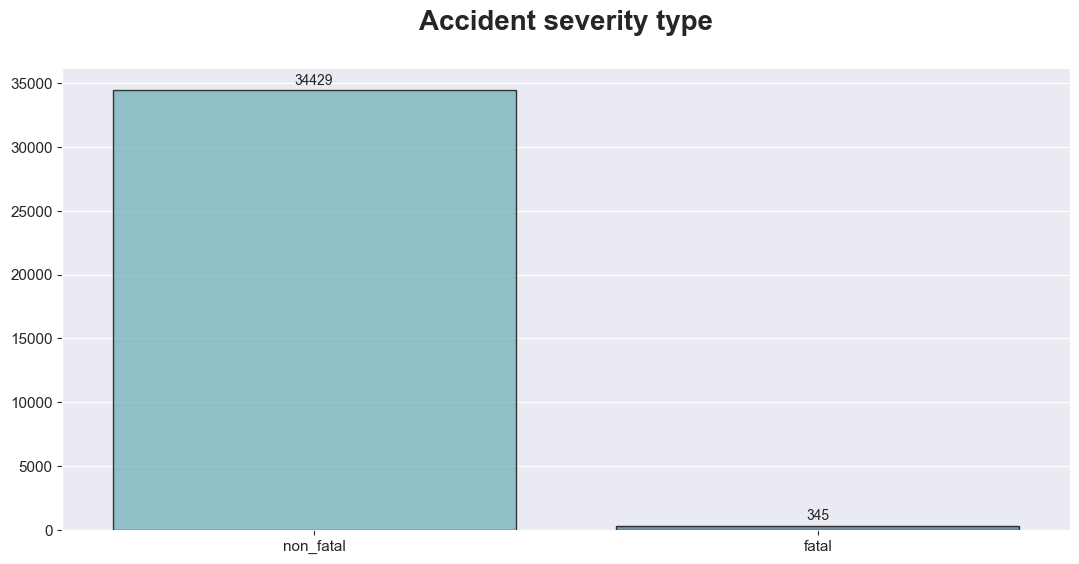

In [266]:
#code for the different accident severity
plt.figure(figsize=(13, 6))
severity_counts = modelling_data.groupby(['accident_index', 'severity_type']).size().reset_index(name='count')
severity_count_plot = sns.countplot(x='severity_type',
                                    data=severity_counts,
                                    edgecolor='black',
                                    palette='GnBu_d',
                                    alpha=0.75,
                                    linewidth=1)


# Adding labels to the bars
for bars in severity_count_plot.containers:
    severity_count_plot.bar_label(bars, padding=2, fontsize=10)

plt.title('Accident severity type\n', fontsize=20, fontweight='bold')
plt.tick_params(bottom=True, left=True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel(xlabel = '', fontsize=15, fontweight='bold')
plt.ylabel(ylabel = '', fontsize=15, fontweight='bold')

plt.show()

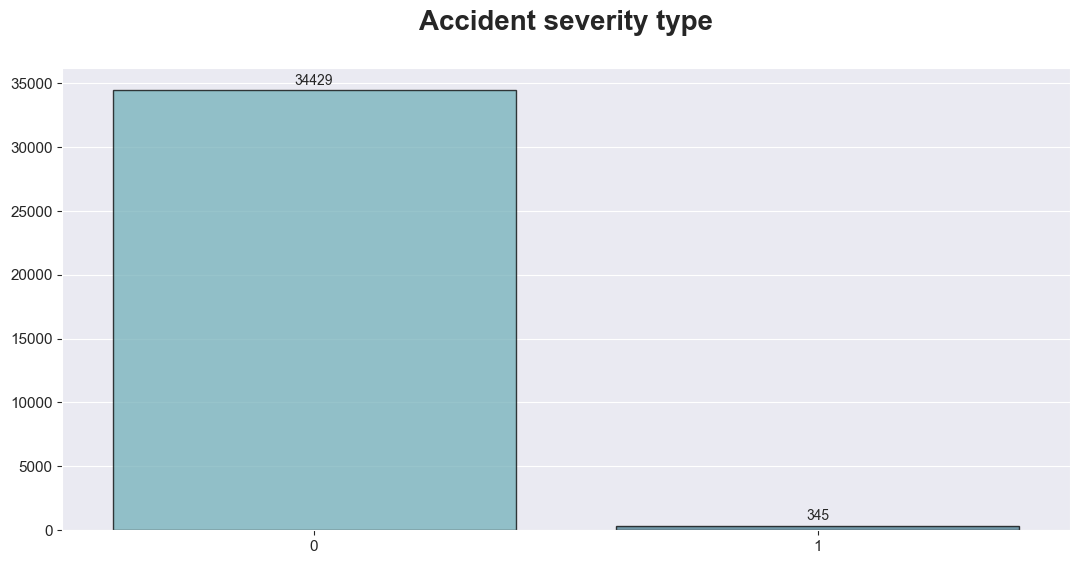

In [267]:
modelling_data['severity_class'] = modelling_data['severity_type'].replace({'non_fatal': 0, 'fatal': 1})

#code for the different accident severity
plt.figure(figsize=(13, 6))
severity_counts = modelling_data.groupby(['accident_index', 'severity_class']).size().reset_index(name='count')
severity_count_plot = sns.countplot(x='severity_class',
                                    data=severity_counts,
                                    edgecolor='black',
                                    palette='GnBu_d',
                                    alpha=0.75,
                                    linewidth=1)


# Adding labels to the bars
for bars in severity_count_plot.containers:
    severity_count_plot.bar_label(bars, padding=2, fontsize=10)

plt.title('Accident severity type\n', fontsize=20, fontweight='bold')
plt.tick_params(bottom=True, left=True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel(xlabel = '', fontsize=15, fontweight='bold')
plt.ylabel(ylabel = '', fontsize=15, fontweight='bold')

plt.show()

## MODELLING

In [268]:
#importing pipeline and model preprocessing modules
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as Pipeline_imb, make_pipeline as make_pipeline_imb
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, RandomOverSampler


#importing our classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier


#importing 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

#importing modules for feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

__Preprocessors__

In [269]:
#mapping columns processors
std_scaler_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

In [270]:
modelling_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51243 entries, 1 to 153174
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               51243 non-null  object 
 1   location_easting_osgr                        51243 non-null  float64
 2   location_northing_osgr                       51243 non-null  float64
 3   latitude                                     51243 non-null  float64
 4   longitude                                    51243 non-null  float64
 5   number_of_casualties                         51243 non-null  int64  
 6   day_of_week                                  51243 non-null  int64  
 7   local_authority_district                     51243 non-null  int64  
 8   first_road_class                             51243 non-null  int64  
 9   road_type                                    51243 non-null  int64  
 10  sp

In [271]:
modelling_data.shape

(51243, 52)

In [272]:
#defining the columns
categorical_columns_modelling = modelling_data.iloc[:, 6:27].columns.tolist() + \
                                modelling_data.iloc[:, 28:43].columns.tolist() + \
                                modelling_data.iloc[:, [44, 46, 48, 49, 50]].columns.tolist()

numerical_columns_modelling = modelling_data.iloc[:, [1, 2, 3, 4, 5, 43, 45, 47]].columns.tolist()

__Using column transformer for transforming the columns__

In [273]:
#using the column transformer

accident_processing = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns_modelling),
    ('min_max_preprocessor', std_scaler_preprocessor, numerical_columns_modelling),
], sparse_threshold=0)


__Make a dataframe of equally distributed target values__

In [274]:
# amount of fatal accidents is 345 rows

fatal = modelling_data.loc[modelling_data['severity_class'] == 1]
non_fatal = modelling_data.loc[modelling_data['severity_class'] == 0 ][:500]

normal_distributed_df = pd.concat([fatal, non_fatal])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state = 42)
new_df.head()

accident_index  location_easting_osgr  location_northing_osgr  \
75849   2020200993057               431749.0                282368.0   
100184  2020360986784               634292.0                290768.0   
17      2020010228024               534377.0                197476.0   
97387   2020350969952               549837.0                256062.0   
46846   202006J269267               394335.0                392878.0   

         latitude  longitude  number_of_casualties  day_of_week  \
75849   52.438384  -1.534382                     1            5   
100184  52.464573   1.447665                     1            6   
17      51.660013  -0.058620                     4            4   
97387   52.182474   0.190204                     2            6   
46846   53.432670  -2.086730                     3            4   

        local_authority_district  first_road_class  road_type  speed_limit  \
75849                        302                 4          6           30   
100184                       406                 3          6           60   
17                            32                 3          3           40   
97387                        395                 6          6           40   
46846                        109                 3          6           30   

        junction_detail  junction_control  second_road_class  \
75849                 3                 4                  6   
100184                3                 4                  6   
17                    6                 2                  5   
97387                 3                 4                  6   
46846                 3                 4                  6   

        second_road_number  pedestrian_crossing_human_control  \
75849                    0                                  0   
100184                   0                                  0   
17                       0                                  0   
97387                    0                                  0   
46846                    0                                  0   

        pedestrian_crossing_physical_facilities  light_conditions  \
75849                                         4                 5   
100184                                        8                 5   
17                                            5                 4   
97387                                         0                 1   
46846                                         0                 1   

        weather_conditions  road_surface_conditions  \
75849                    1                        1   
100184                   2                        2   
17                       1                        2   
97387                    1                        1   
46846                    1                        1   

        special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
75849                            0                    0                    2   
100184                           0                    0                    2   
17                               0                    0                    1   
97387                            0                    0                    1   
46846                            0                    0                    1   

        did_police_officer_attend_scene_of_accident  trunk_road_flag  month  \
75849                                             2                2     10   
100184                                            1                2     10   
17                                                1                2      1   
97387                                             1                2      7   
46846                                             1                2      2   

        hour severity_type  vehicle_type  towing_and_articulation  \
75849     18         fatal             9                        0   
100184    20         fatal             9                        0   
17         3     

In [275]:
new_df.shape

(992, 52)

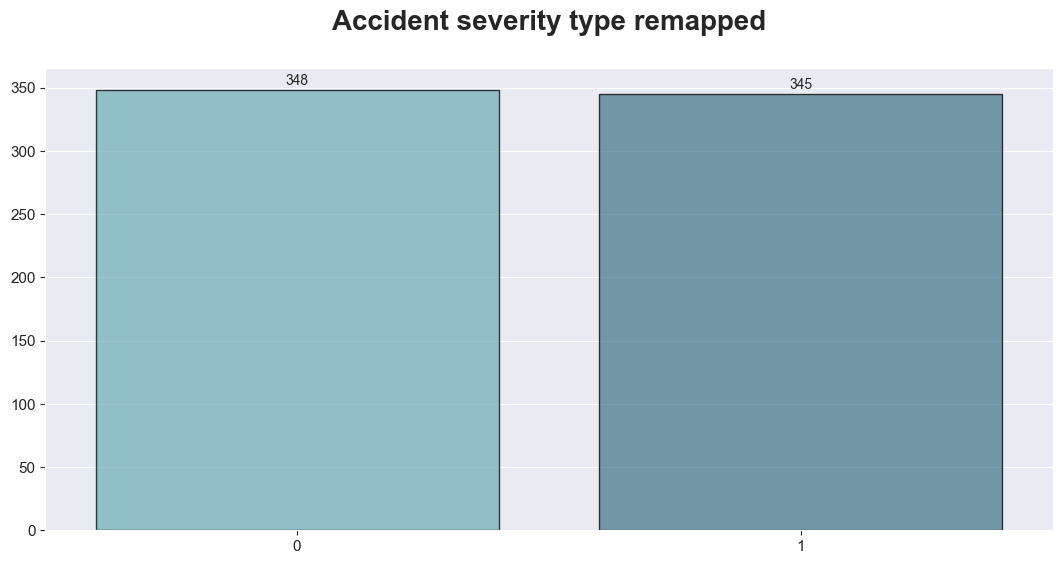

In [502]:
#code for the different accident severity
plt.figure(figsize=(13, 6))
severity_counts = new_df.groupby(['accident_index', 'severity_class']).size().reset_index(name='count')
severity_count_plot = sns.countplot(x='severity_class',
                                    data=severity_counts,
                                    edgecolor='black',
                                    palette='GnBu_d',
                                    alpha=0.75,
                                    linewidth=1)


# Adding labels to the bars
for bars in severity_count_plot.containers:
    severity_count_plot.bar_label(bars, padding=2, fontsize=10)

plt.title('Accident severity type remapped\n', fontsize=20, fontweight='bold')
plt.tick_params(bottom=True, left=True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel(xlabel = '', fontsize=15, fontweight='bold')
plt.ylabel(ylabel = '', fontsize=15, fontweight='bold')

plt.show()

__Separating the dataset into X and Y Groups (Features and targets)__

In [277]:
Y = new_df['severity_class']
X = new_df.iloc[:, [1, 2, 3, 4, 5, 43, 45, 47, 44, 46, 48, 49, 50]].join(new_df.iloc[:, 6:27].join(new_df.iloc[:, 28:43]))


In [278]:
X.shape

(992, 49)

In [279]:
Y.unique()

array([1, 0], dtype=int64)

__Splitting dataset into training and test sets__

In [280]:
#splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)

__Key elements of the models to be developed would involve balancing the dataset, feature selection and hyperparameter optimization__

__Defining the hyperparameter optimization space for Random Search. Five classifiers will be adopted for the experiments including:__
1. Random Forest
2. Decision Trees
3. SVM
4. KNN
5. XGBoost


__However, before optimizing parameters and handling imbalanced dataset, I will build a baseline model using Random Forest.__

## Optimizing parameters and handling imbalanced dataset

__Hyperparamters to optimize and search space defined for Random Search__

In [281]:
"""
Random Forest and Decision Trees
"""
n_estimators_rf = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features_rf = ['auto', 'sqrt']
max_depth_rf = [int(x) for x in np.linspace(1, 110, num = 40)]
min_samples_split_rf = [2, 5, 10,20,30]
min_samples_leaf_rf = [1,2,4,6,10,20,30,50,70,100]
bootstrap_rf = [True, False]
criterion_dt = ["gini", "entropy"]


"""
SVM
"""
C_range = np.logspace(-10, 10, 21)
gamma = np.logspace(-10, 10, 21)


"""
KNN
"""
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(start = 1, stop = 50, num = 25)]
metric_knn = ['minkowski','euclidean','manhattan']
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 30, num = 20)]
distances_knn = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]
weights_knn = ['uniform','distance']


"""
XGBoost
"""
n_estimators_xgb = [100, 300, 500, 800, 1000]
learning_rate_xgb = [0.01, 0.1, 0.2]
max_depth_xgb = [3, 5, 8, 12]
min_child_weight = [1, 5, 10]
subsample_xgb = [0.8, 0.9, 1.0]
colsample_bytree = [0.8, 0.9, 1.0]
gamma_xgb = [0, 0.1, 0.3]
reg_alpha = [0, 0.1, 1.0]
reg_lambda = [0, 0.1, 1.0]



"""
NEXT IS PUTTING THESE HYPERPARAMETERS INTO A LIST
"""

#Random Forest
rf_optimization = [{'randomforestclassifier__n_estimators': n_estimators_rf,
                    'randomforestclassifier__max_features': max_features_rf,
                     'randomforestclassifier__max_depth': max_depth_rf,
                     'randomforestclassifier__min_samples_split': min_samples_split_rf,
                     'randomforestclassifier__min_samples_leaf': min_samples_leaf_rf,
                     'randomforestclassifier__bootstrap': bootstrap_rf,
                            }]


#Decision Trees
dt_optimization = [{'decisiontreeclassifier__criterion': criterion_dt,
                    'decisiontreeclassifier__max_depth': max_depth_rf,
                    'decisiontreeclassifier__min_samples_split': min_samples_split_rf,
                    'decisiontreeclassifier__min_samples_leaf': min_samples_leaf_rf,
                    'decisiontreeclassifier__max_features': max_features_rf,
                                }]


#KNN
knn_optimization = [{'kneighborsclassifier__algorithm': algorithm,
                     'kneighborsclassifier__leaf_size': leaf_size,
                     'kneighborsclassifier__metric': metric_knn,
                     'kneighborsclassifier__n_neighbors': n_neighbors,
                     'kneighborsclassifier__p': distances_knn,
                     'kneighborsclassifier__weights': weights_knn
                             }]


#SVM
svm_optimization = [{'svc__C': C_range, 
                     'svc__gamma': gamma}]


#XGBoost
xgboost_optimization = [{'xgbclassifier__learning_rate': learning_rate_xgb,
                         'xgbclassifier__n_estimators': n_estimators_xgb,
                         'xgbclassifier__max_depth': max_depth_xgb,
                         'xgbclassifier__min_child_weight': min_child_weight,
                         'xgbclassifier__subsample': subsample_xgb,
                         'xgbclassifier__colsample_bytree': colsample_bytree,
                         'xgbclassifier__gamma': gamma_xgb,
                         'xgbclassifier__reg_alpha': reg_alpha,
                         'xgbclassifier__reg_lambda': reg_lambda
                         }]

__Defining the pipelines and classifiers__

In [306]:
"""
Random Forest Pipeline
-processing the dataset for modelling
-Handling class imbalance using SMOTE
"""
rf_classifier = make_pipeline_imb(accident_processing,                                    
                                  SelectKBest(k=15),
                                  RandomForestClassifier(random_state = 42))

"""
Decision Trees Pipeline
-processing the dataset for modelling
-Handling class imbalance using SMOTE
"""
dt_classifier = make_pipeline_imb(accident_processing,
                                  SelectKBest(k=15),                                  
                                  DecisionTreeClassifier(random_state=42))

"""
KNN Pipeline
-processing the dataset for modelling
-Handling class imbalance using SMOTE
"""
knn_classifier = make_pipeline_imb(accident_processing,
                                   SelectKBest(k=15),                                   
                                   KNeighborsClassifier())

"""
SVM Pipeline
-processing the dataset for modelling
-Handling class imbalance using SMOTE
"""
svm_classifier = make_pipeline_imb(accident_processing,
                                   SelectKBest(k=15),
                                   svm.SVC(random_state=42, probability=True))

"""
XGBoost Pipeline
-processing the dataset for modelling
-Handling class imbalance using SMOTE
"""
xgboost_classifier = make_pipeline_imb(accident_processing,
                                       SelectKBest(k=15),
                                       XGBClassifier(random_state=42))

__Defining the ranmdom search hyperparameter optimization variables__

In [307]:
"""
Random Forest Random Search
"""
random_search_rf  =  RandomizedSearchCV(estimator = rf_classifier,
                                      param_distributions = rf_optimization,
                                      n_iter = 70,
                                      scoring = ['recall_macro'],
                                      refit = 'recall_macro',
                                      cv = 3)

"""
Decision Trees Random Search
"""
random_search_dt  =  RandomizedSearchCV(estimator = dt_classifier,
                                      param_distributions = dt_optimization,
                                      n_iter = 70,
                                      scoring = ['recall_macro'],
                                      refit = 'recall_macro',
                                      cv = 3)

"""
KNN Random Search
"""
random_search_knn  =  RandomizedSearchCV(estimator = knn_classifier,
                                      param_distributions = knn_optimization,
                                      n_iter = 70,
                                      scoring = ['recall_macro'],
                                      refit = 'recall_macro',
                                      cv = 3)

"""
SVM Random Search
"""
random_search_svm  =  RandomizedSearchCV(estimator = svm_classifier,
                                      param_distributions = svm_optimization,
                                      n_iter = 70,
                                      scoring = ['recall_macro'],
                                      refit = 'recall_macro',
                                      cv = 3)

"""
XGBoost Random Search
"""
random_search_xg  =  RandomizedSearchCV(estimator = xgboost_classifier,
                                      param_distributions = xgboost_optimization,
                                      n_iter = 70,
                                      scoring = ['recall_macro'],
                                      refit = 'recall_macro',
                                      cv = 3)

## Baseline Random Forest Model

In [308]:
"""
Baseline Random Forest Pipeline
-processing the dataset for modelling
"""
baseline_rf_classifier = make_pipeline_imb(accident_processing,
                                           SelectKBest(k=10),
                                           RandomForestClassifier(random_state=42))

In [309]:
%%time
"""
Fitting the model
"""
baseline_rf_classifier.fit(X_train, Y_train)

CPU times: total: 141 ms
Wall time: 152 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_of_week',
                                                   'local_authority_district',
                                                   'first_road_class',
                                                   'road_type', 'speed_limit',
                                                   'junction_detail',
                                                   'junction_control',
                                                   'second_road_class',
                                                   'second_road_number',
                                                   'pedestrian_crossing_human_control',
                                                   'pe...
                                                   'skidding_and_overturning',
                                                   'hit_object_in_carriageway', ...]),
                                                 ('min_max_preprocessor',
                                                  StandardScaler(),
                                                  ['location_easting_osgr',
                                                   'location_northing_osgr',
                                                   'latitude', 'longitude',
                                                   'number_of_casualties',
                                                   'age_of_driver',
                                                   'engine_capacity_cc',
                                                   'age_of_vehicle'])])),
                ('selectkbest', SelectKBest()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [310]:
"""
Printing the classification report for the baseline model
"""
baseline_y_predictions = baseline_rf_classifier.predict(X_test)
print('\n Baseline Random Forest Classifier Classification report: \n {}\n'
      .format(classification_report(Y_test, baseline_y_predictions)))


 Baseline Random Forest Classifier Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.98      0.99        55

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100




## Optimizing paramaters for all models defined earlier and handling class imbalance

__Printing out the pipeline steps__

In [311]:
"""
Putting the random search pipe into a list and printing out the results of the pipeline 
"""
random_search_pipe = [random_search_rf,
                      random_search_dt,
                      random_search_knn,
                      random_search_svm,
                      random_search_xg]

#print steps in the pipeline
for pipe in random_search_pipe:
    print (pipe)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('one-hot-encoder',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['day_of_week',
                                                                                'local_authority_district',
                                                                                'first_road_class',
                                                                                'road_type',
                                                                                'speed_limit',
                                                                                'junction_detail',
                 

__Fitting all the models optimized for hyperparameters and handling class imbalance__

In [312]:
%%time
#fitting our models
for pipe in random_search_pipe:
    pipe.fit(X_train,Y_train)

CPU times: total: 13min 16s
Wall time: 3min 16s


In [356]:
best_params_list = []

# Print the best estimators and their parameters
for pipe in random_search_pipe:
    best_params = pipe.best_params_
    best_params_list.append((pipe, best_params))
    
    classifier_name = list(pipe.best_estimator_.named_steps.keys())[-1]

    print(f"Best Estimator for {classifier_name}:")
    print("Best Parameters:")
    print(best_params)
    print("\n")

Best Estimator for randomforestclassifier:
Best Parameters:
{'randomforestclassifier__n_estimators': 1600, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 59, 'randomforestclassifier__bootstrap': True}


Best Estimator for decisiontreeclassifier:
Best Parameters:
{'decisiontreeclassifier__min_samples_split': 20, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 42, 'decisiontreeclassifier__criterion': 'entropy'}


Best Estimator for kneighborsclassifier:
Best Parameters:
{'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__p': 5, 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__leaf_size': 33, 'kneighborsclassifier__algorithm': 'brute'}


Best Estimator for svc:
Best Parameters:
{'svc__gamma': 0.01, 's

__Using the model to predict whether an accident is fatal or non_fatal__

In [313]:
"""
Creating a dictionary of the names of the models
"""
models_dict = {0: 'Random Forest',
               1: 'Decision Trees', 
               2: 'KNN',
               3: 'SVM', 
               4: 'XGBoost'
              }

"""
Printing the classification report
"""
#using the for loop to go over all the models
for i, model in enumerate(random_search_pipe):
    y_pred_models = model.predict(X_test)
    print('{} Classification report: \n {}\n'.format(models_dict[i],
    classification_report(Y_test,y_pred_models)))

Random Forest Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.98      0.99        55

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Decision Trees Classification report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.96      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


KNN Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.96      0.96      0.96        55

    accuracy                           0.96       100
   macro avg      

In [378]:
feature_importance_dict = {}

for pipe in random_search_pipe:
    best_model = pipe.best_estimator_

    # Access the classifier name from the keys in named_steps
    classifier_name = list(best_model.named_steps.keys())[-1]

    if classifier_name == 'randomforestclassifier' and isinstance(best_model.named_steps[classifier_name], RandomForestClassifier):
        feature_importances = best_model.named_steps[classifier_name].feature_importances_
        feature_importance_dict[classifier_name] = dict(zip(X.columns, feature_importances))

    elif classifier_name == 'xgbclassifier' and isinstance(best_model.named_steps[classifier_name], XGBClassifier):
        feature_importances = best_model.named_steps[classifier_name].feature_importances_
        feature_importance_dict[classifier_name] = dict(zip(X.columns, feature_importances))

# Rank the features based on importance scores
for classifier_name, importance_scores in feature_importance_dict.items():
    sorted_features = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)
    print(f"{classifier_name} Feature Rankings:")
    for feature, importance in sorted_features:
        print(f"{feature}: {importance}")
    print("\n")

randomforestclassifier Feature Rankings:
age_of_driver: 0.34947689790176817
local_authority_district: 0.14250241534737423
day_of_week: 0.1363799591755832
driver_imd_decile: 0.13604771515525604
driver_home_area_type: 0.1291399126074104
number_of_casualties: 0.030718604122119998
longitude: 0.030558124807527502
age_band_of_driver: 0.010257403693380763
location_northing_osgr: 0.010115409121912163
propulsion_code: 0.0072324160094751596
engine_capacity_cc: 0.007139166847892317
age_of_vehicle: 0.004313006658653192
latitude: 0.0023760447087262195
generic_make_model: 0.0020206436383564726
location_easting_osgr: 0.0017222802045642614


xgbclassifier Feature Rankings:
age_of_driver: 0.63273686170578
driver_imd_decile: 0.16465696692466736
driver_home_area_type: 0.07804542034864426
age_band_of_driver: 0.053547345101833344
day_of_week: 0.025753561407327652
propulsion_code: 0.015126164071261883
local_authority_district: 0.010136440396308899
location_easting_osgr: 0.006280921399593353
longitude: 0.005

__Use the original modelling data and predict using the parameters__

__Separating the dataset into X and Y Groups (Features and targets)__

In [377]:
modelling_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51243 entries, 1 to 153174
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               51243 non-null  object 
 1   location_easting_osgr                        51243 non-null  float64
 2   location_northing_osgr                       51243 non-null  float64
 3   latitude                                     51243 non-null  float64
 4   longitude                                    51243 non-null  float64
 5   number_of_casualties                         51243 non-null  int64  
 6   day_of_week                                  51243 non-null  int64  
 7   local_authority_district                     51243 non-null  int64  
 8   first_road_class                             51243 non-null  int64  
 9   road_type                                    51243 non-null  int64  
 10  sp

__Splitting dataset into training and test sets__

In [440]:
#defining the columns
categorical_columns_new = modelling_data.iloc[:, [6, 7, 44, 46, 49, 50]].columns.tolist()
numerical_columns_new = modelling_data.iloc[:, [1, 2, 3, 4, 5, 43, 45, 47]].columns.tolist()

In [441]:
Y_new = modelling_data['severity_class']
X_new = modelling_data.iloc[:, [1, 2, 3, 4, 5, 43, 45, 47,
                                6, 7, 44, 46, 49, 50]]

In [442]:
print(X_new.columns.tolist())

['location_easting_osgr', 'location_northing_osgr', 'latitude', 'longitude', 'number_of_casualties', 'age_of_driver', 'engine_capacity_cc', 'age_of_vehicle', 'day_of_week', 'local_authority_district', 'age_band_of_driver', 'propulsion_code', 'driver_imd_decile', 'driver_home_area_type']


In [448]:
accident_processing_2 = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns_new),
    ('min_max_preprocessor', std_scaler_preprocessor, numerical_columns_new),
], sparse_threshold=0)

In [444]:
#splitting data into training and test sets
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size = 0.2, random_state=42)

In [449]:
X_train_processed = accident_processing_2.fit_transform(X_train_new)
X_test_processed = accident_processing_2.transform(X_test_new)

In [451]:
X_train_processed.shape

(40994, 368)

In [452]:
#applying SMOTE to the new data
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train_processed, Y_train_new)

In [453]:
rf_new = RandomForestClassifier(n_estimators=1600, min_samples_split=5, min_samples_leaf=2,
                                            max_features='sqrt', max_depth=59, bootstrap=True, random_state=42)

In [454]:
X_train_smote.shape

(81232, 368)

In [455]:
%%time
rf_new.fit(X_train_smote, Y_train_smote)

CPU times: total: 5min 12s
Wall time: 5min 15s


RandomForestClassifier(max_depth=59, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1600, random_state=42)

In [457]:
# Predict using the best_rf_classifier
y_pred_rf = rf_new.predict(X_test_processed)

# Print the classification report
print("Classification Report for RandomForestClassifier:")
report_rf = classification_report(Y_test_new, y_pred_rf)
print(report_rf)

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10135
           1       0.00      0.00      0.00       114

    accuracy                           0.99     10249
   macro avg       0.49      0.50      0.50     10249
weighted avg       0.98      0.99      0.98     10249

